<a href="https://colab.research.google.com/github/niveditac-98/kdd-group-5/blob/main/KDD_Project_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysis of the impact of COVID-19 on the Stock Market across different sectors and post-pandemic prediction of the same.

###Team :
*   Nivedita Chinnakannu (801200447)
*   Sayali Ambulkar (801200407)
*   Ishani Naik (801223537)
*   Meghana Palaparthi (801203546)





###Data and Source Description:

In our project, we have used COVID-19, S&P 500 Stock Market, and Vaccination datasets. The data of the Health Care, IT, and Industrial sectors were included and merged with the COVID-19 dataset on the date column. <br>
COVID-19 dataset has the features confirmed cases, deaths, and recoveries for each day. Stock market data has the features High, Low, Close, and Adjusted Close prices for each day.<br>
We used the data available at the following links:

<a>https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset</a><br>
<a>https://www.kaggle.com/paultimothymooney/stock-market-data</a><br>
<a>https://www.kaggle.com/gpreda/covid-19-vaccination-progress/data</a><br>


###Business Understanding
<p>The outbreak of the COVID-19 pandemic triggered a freefall in share prices. In the year since, the world has changed, transforming our lives, our economies, and the fortunes of our businesses—an unfolding journey that is reflected in the ups and downs of share prices. The fundamental trends have accelerated, propelling some companies forward at record speed while for others headwinds have turned into hurricanes.</p>
<p>We deemed it would be of great use to individuals and businesses to know how variations in confirmed cases, death and recoveries due to COVID-19 effects stock prices. In our project, we are trying to predict the stock prices of companies in three different sectors namely, health care, IT and industrials based on COVID-19 cases.</p>


###Data Preparation:

We have used the updated datasets from the above-mentioned links.<br>We performed the above steps using both Python and DataRobot.<br>
*   We initially merged COVID-19 and Stock Market datasets for each sector separately.
*   We used the vaccination dataset independently, without merging with the aforementioned datasets.
*   We performed data cleaning by dropping duplicate values, dropping rows with null values, dropping unnecessary/irrelevant columns, changing the column datatypes, changing date formats.
*   We then checked if there are any anomalies in the data that needed to be handled.







In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
drive_path = "/content/drive/My Drive/KDD group Project/"

####Importing necessary libraries

In [97]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import gridspec
import os
%matplotlib inline

####Reading various companies data

In [98]:
# S&P500 Healthcare Companies
a = pd.read_csv(drive_path + "A.csv")
abc = pd.read_csv(drive_path + "ABC.csv")
abbv = pd.read_csv(drive_path + "ABBV.csv")
abt = pd.read_csv(drive_path + "ABT.csv")
abmd = pd.read_csv(drive_path + "ABMD.csv")

# S&P500 Information Technology Companies
aapl = pd.read_csv(drive_path + "AAPL.csv")
acn = pd.read_csv(drive_path + "ACN.csv")
adi = pd.read_csv(drive_path + "ADI.csv")
adp = pd.read_csv(drive_path + "ADP.csv")
adsk = pd.read_csv(drive_path + "ADSK.csv")

# S&P500 Industrials Companies
aal = pd.read_csv(drive_path + "AAL.csv")
alk = pd.read_csv(drive_path + "ALK.csv")
alle = pd.read_csv(drive_path + "ALLE.csv")
ame = pd.read_csv(drive_path + "AME.csv")
aos = pd.read_csv(drive_path + "AOS.csv")

covid = pd.read_csv(drive_path + "covid_19_data.csv")

In [99]:
covid.head()

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01-22-2020          Anhui  ...         1      0          0
1    2      01-22-2020        Beijing  ...        14      0          0
2    3      01-22-2020      Chongqing  ...         6      0          0
3    4      01-22-2020         Fujian  ...         1      0          0
4    5      01-22-2020          Gansu  ...         0      0          0

[5 rows x 8 columns]

In [100]:
a.head()

Date        Low       Open  ...       High      Close  Adjusted Close
0  18-11-1999  28.612303  32.546494  ...  35.765381  31.473534       27.102232
1  19-11-1999  28.478184  30.713518  ...  30.758226  28.880545       24.869375
2  22-11-1999  28.657009  29.551144  ...  31.473534  31.473534       27.102232
3  23-11-1999  28.612303  30.400572  ...  31.205294  28.612303       24.638391
4  24-11-1999  28.612303  28.701717  ...  29.998213  29.372318       25.292847

[5 rows x 7 columns]

In [101]:
# S&P Healthcare Companies
a.insert(1, "Code",'A')
abc.insert(1, 'Code','ABC')
abbv.insert(1, "Code",'ABBV')
abt.insert(1, "Code",'ABT')
abmd.insert(1, "Code",'ABMD')

In [102]:
# S&P Information Technology Companies
aapl.insert(1, "Code",'AAPL')
acn.insert(1, 'Code','ACN')
adi.insert(1, "Code",'ADI')
adp.insert(1, "Code",'ADP')
adsk.insert(1, "Code",'ADSK')

In [103]:
# S&P Industrials Companies
aal.insert(1, "Code",'AAL')
alk.insert(1, 'Code','ALK')
alle.insert(1, "Code",'ALLE')
ame.insert(1, "Code",'AME')
aos.insert(1, "Code",'AOS')

In [104]:
list_stock_data = [a, abc, abbv, abt, abmd]
list_stock_data_IT = [aapl, acn, adi, adp, adsk]
list_stock_data_Industrials = [aal, alk, alle, ame, aos]

In [105]:
list_stock_data

[            Date Code         Low  ...        High       Close  Adjusted Close
 0     18-11-1999    A   28.612303  ...   35.765381   31.473534       27.102232
 1     19-11-1999    A   28.478184  ...   30.758226   28.880545       24.869375
 2     22-11-1999    A   28.657009  ...   31.473534   31.473534       27.102232
 3     23-11-1999    A   28.612303  ...   31.205294   28.612303       24.638391
 4     24-11-1999    A   28.612303  ...   29.998213   29.372318       25.292847
 ...          ...  ...         ...  ...         ...         ...             ...
 5543  30-11-2021    A  149.699997  ...  155.710007  150.899994      150.899994
 5544  01-12-2021    A  148.089996  ...  152.850006  148.210007      148.210007
 5545  02-12-2021    A  147.729996  ...  152.470001  150.990005      150.990005
 5546  03-12-2021    A  147.720001  ...  153.000000  149.330002      149.330002
 5547  06-12-2021    A  147.889999  ...  150.130005  148.729996      148.729996
 
 [5548 rows x 8 columns],
            

In [154]:
stock_data = pd.concat(list_stock_data)
stock_data_IT = pd.concat(list_stock_data_IT)
stock_data_Industrials = pd.concat(list_stock_data_Industrials)

###Domain Understanding
<a>https://towardsdatascience.com/covid-19-rampage-on-the-stock-market-machine-learning-comes-to-explain-3332707954af</a> - This addresses the study of companies that lost most of their stock price during COVID-19. This article explains the use of Decision Tress to predict the stock market.<br>
<a>https://arxiv.org/abs/2105.02785</a> - This paper discusses the forecast performance of four models including Long-Short Term Memory, XGBoost, Autoregression, and Last Value on stock prices.<br>
<a>https://en.wikipedia.org/wiki/Linear_regression</a> - This site explains the working of Multiple Linear Regression and it’s uses.


###Data Visualization and Analysis

**Healthcare Sector Companies:**

In [153]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
Precovid_stock_data = stock_data.loc[stock_data.Date >= '01-01-2015'].copy()

Precovid_stock_data

Date  Code         Low  ...        High       Close  Adjusted Close
3803 2015-02-01     A   40.369999  ...   41.310001   40.560001       38.184975
3804 2015-05-01     A   39.700001  ...   40.459999   39.799999       37.469482
3805 2015-06-01     A   39.020000  ...   40.020000   39.180000       36.885777
3806 2015-07-01     A   39.290001  ...   39.810001   39.700001       37.375332
3807 2015-08-01     A   40.180000  ...   40.980000   40.889999       38.495640
...         ...   ...         ...  ...         ...         ...             ...
8655 2021-11-30  ABMD  312.429993  ...  321.410004  314.779999      314.779999
8656 2021-01-12  ABMD  305.709991  ...  325.230011  305.709991      305.709991
8657 2021-02-12  ABMD  304.570007  ...  314.980011  312.440002      312.440002
8658 2021-03-12  ABMD  295.709991  ...  316.619995  300.630005      300.630005
8659 2021-06-12  ABMD  297.220001  ...  305.569885  302.105011      302.105011

[8724 rows x 8 columns]

In [108]:
mean_df_A =Precovid_stock_data[Precovid_stock_data["Code"] == "A"]
mean_df_A  = mean_df_A .groupby(['Date']).mean()
mean_df_ABC =Precovid_stock_data[Precovid_stock_data["Code"] == "ABC"]
mean_df_ABC  = mean_df_ABC.groupby(['Date']).mean()
mean_df_ABBV =Precovid_stock_data[Precovid_stock_data["Code"] == "ABBV"]
mean_df_ABBV  = mean_df_ABBV .groupby(['Date']).mean()
mean_df_ABT =Precovid_stock_data[Precovid_stock_data["Code"] == "ABT"]
mean_df_ABT  = mean_df_ABT .groupby(['Date']).mean()
mean_df_ABMD =Precovid_stock_data[Precovid_stock_data["Code"] == "ABMD"]
mean_df_ABMD  = mean_df_ABMD .groupby(['Date']).mean()


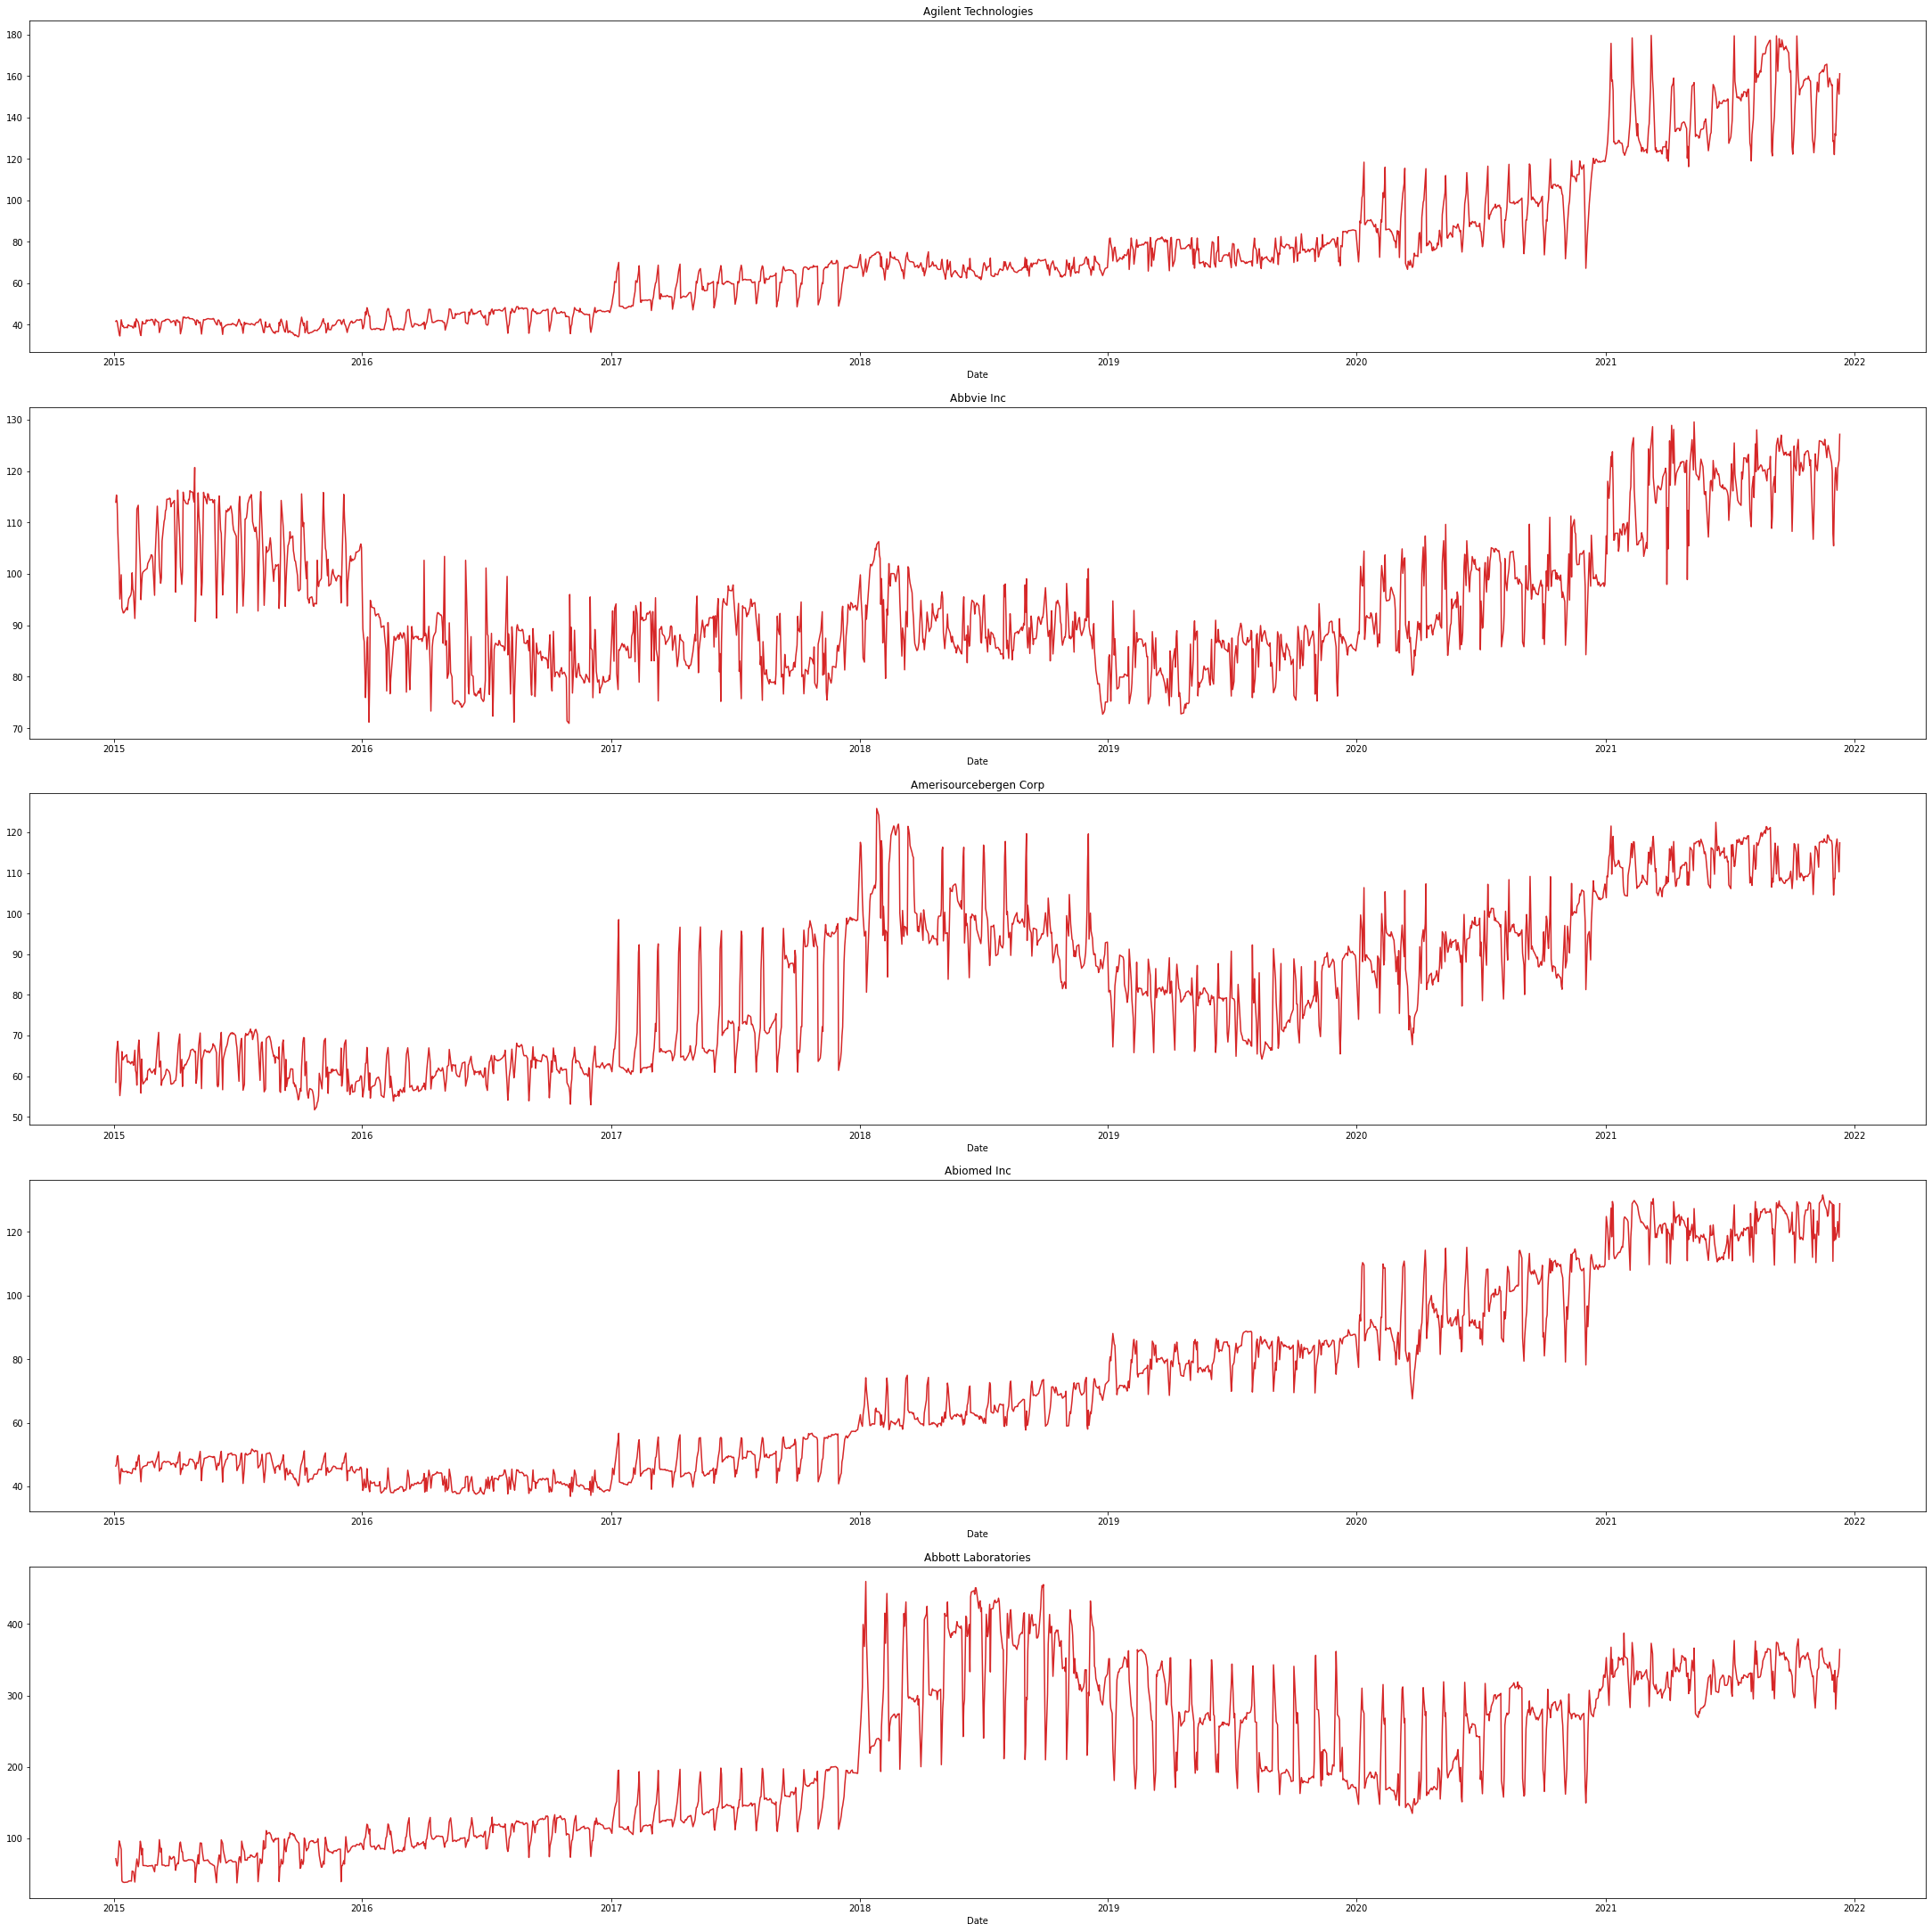

In [155]:
# The stock prices of the company under observation in the S&P 500 Healthcare sector varying with time
fig, axs = plt.subplots(nrows= 5,constrained_layout=True,figsize=(30,30))

axs[0].plot(mean_df_A.index, mean_df_A['High'], 'tab:red')
axs[0].set_title('Agilent Technologies')
axs[1].plot(mean_df_ABC.index, mean_df_ABC['High'], 'tab:red')
axs[1].set_title('Abbvie Inc')
axs[2].plot(mean_df_ABBV.index, mean_df_ABBV['High'], 'tab:red')
axs[2].set_title('Amerisourcebergen Corp')
axs[3].plot(mean_df_ABT.index, mean_df_ABT['High'], 'tab:red')
axs[3].set_title('Abiomed Inc')
axs[4].plot(mean_df_ABMD.index, mean_df_ABMD['High'], 'tab:red')
axs[4].set_title('Abbott Laboratories')
for ax in axs.flat:
    ax.set(xlabel='Date')


**Information Technology Sector Companies:**

In [110]:
stock_data_IT['Date'] = pd.to_datetime(stock_data_IT['Date'])
Precovid_stock_data_IT = stock_data_IT.loc[stock_data_IT.Date >= '01-01-2015'].copy()

Precovid_stock_data_IT

Date  Code         Low  ...        High       Close  Adjusted Close
8589 2015-02-01  AAPL   26.837500  ...   27.860001   27.332500       24.746000
8590 2015-05-01  AAPL   26.352501  ...   27.162500   26.562500       24.048857
8591 2015-06-01  AAPL   26.157499  ...   26.857500   26.565001       24.051126
8592 2015-07-01  AAPL   26.674999  ...   27.049999   26.937500       24.388382
8593 2015-08-01  AAPL   27.174999  ...   28.037500   27.972500       25.325430
...         ...   ...         ...  ...         ...         ...             ...
9180 2021-11-30  ADSK  252.490005  ...  263.000000  254.190002      254.190002
9181 2021-01-12  ADSK  249.410004  ...  265.320007  249.679993      249.679993
9182 2021-02-12  ADSK  250.809998  ...  258.540009  257.660004      257.660004
9183 2021-03-12  ADSK  253.050003  ...  263.489990  259.019989      259.019989
9184 2021-06-12  ADSK  254.339996  ...  262.725006  261.325012      261.325012

[8725 rows x 8 columns]

In [111]:
mean_df_AAPL =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "AAPL"]
mean_df_AAPL  = mean_df_AAPL .groupby(['Date']).mean()
mean_df_ACN =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ACN"]
mean_df_ACN  = mean_df_ACN.groupby(['Date']).mean()
mean_df_ADI =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ADI"]
mean_df_ADI  = mean_df_ADI .groupby(['Date']).mean()
mean_df_ADP =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ADP"]
mean_df_ADP  = mean_df_ADP .groupby(['Date']).mean()
mean_df_ADSK =Precovid_stock_data_IT[Precovid_stock_data_IT["Code"] == "ADSK"]
mean_df_ADSK  = mean_df_ADSK .groupby(['Date']).mean()

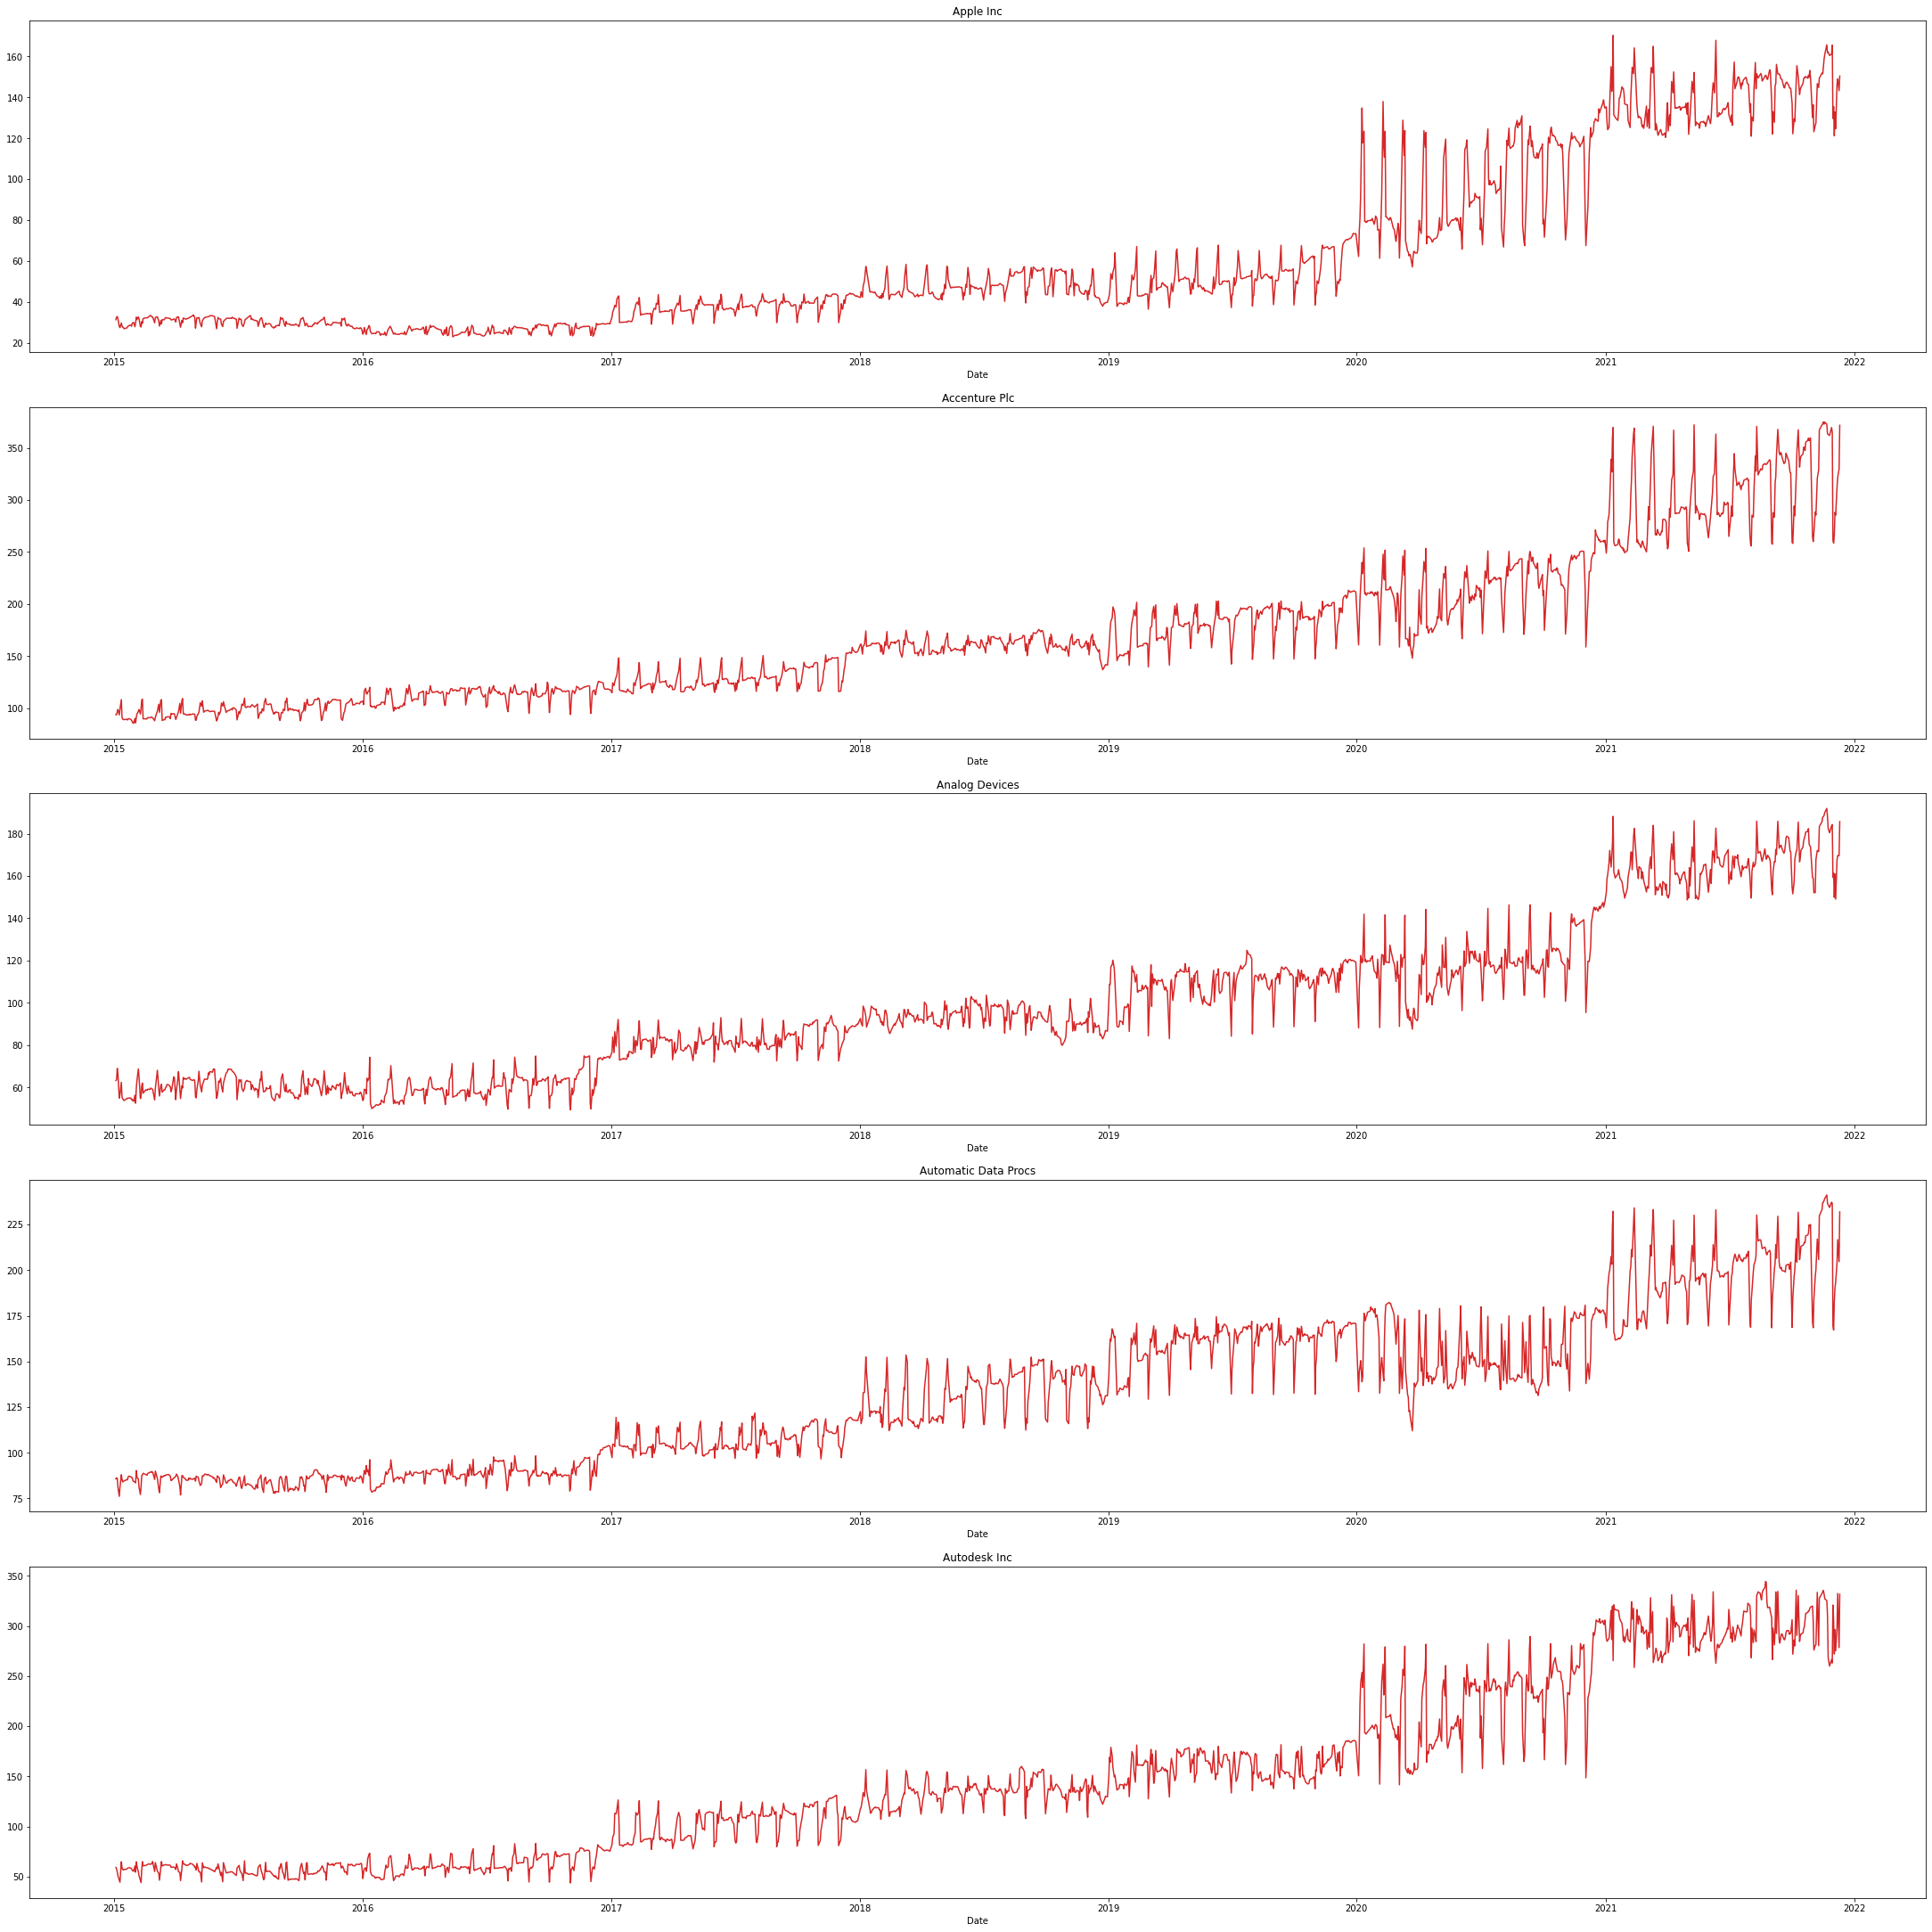

In [156]:
# The stock prices of the company under observation in the S&P 500 IT sector varying with time
fig, axs = plt.subplots(nrows= 5,constrained_layout=True,figsize=(30,30))

axs[0].plot(mean_df_AAPL.index, mean_df_AAPL['High'], 'tab:red')
axs[0].set_title('Apple Inc')
axs[1].plot(mean_df_ACN.index, mean_df_ACN['High'], 'tab:red')
axs[1].set_title('Accenture Plc')
axs[2].plot(mean_df_ADI.index, mean_df_ADI['High'], 'tab:red')
axs[2].set_title('Analog Devices')
axs[3].plot(mean_df_ADP.index, mean_df_ADP['High'], 'tab:red')
axs[3].set_title('Automatic Data Procs')
axs[4].plot(mean_df_ADSK.index, mean_df_ADSK['High'], 'tab:red')
axs[4].set_title('Autodesk Inc')
for ax in axs.flat:
    ax.set(xlabel='Date')

**Industrials Sector Companies:**

In [113]:
stock_data_Industrials['Date'] = pd.to_datetime(stock_data_Industrials['Date'])
Precovid_stock_data_Industrials = stock_data_Industrials.loc[stock_data_Industrials.Date >= '01-01-2015'].copy()

Precovid_stock_data_Industrials

Date Code        Low  ...       High      Close  Adjusted Close
2332 2015-02-01  AAL  53.070000  ...  54.599998  53.910000       51.079910
2333 2015-05-01  AAL  53.340000  ...  54.540001  53.880001       51.051487
2334 2015-06-01  AAL  52.130001  ...  54.430000  53.040001       50.255577
2335 2015-07-01  AAL  52.119999  ...  53.650002  53.009998       50.227161
2336 2015-08-01  AAL  53.250000  ...  54.279999  53.660000       50.843033
...         ...  ...        ...  ...        ...        ...             ...
9621 2021-11-30  AOS  78.830002  ...  81.000000  79.050003       79.050003
9622 2021-01-12  AOS  79.379997  ...  82.570000  79.459999       79.459999
9623 2021-02-12  AOS  79.910004  ...  81.989998  81.080002       81.080002
9624 2021-03-12  AOS  80.610001  ...  82.430000  81.599998       81.599998
9625 2021-06-12  AOS  81.699997  ...  82.800003  81.800003       81.800003

[8725 rows x 8 columns]

In [114]:
mean_df_AAL=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "AAL"]
mean_df_AAL = mean_df_AAL.groupby(['Date']).mean()
mean_df_ALK=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "ALK"]
mean_df_ALK = mean_df_ALK.groupby(['Date']).mean()
mean_df_ALLE=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "ALLE"]
mean_df_ALLE = mean_df_ALLE.groupby(['Date']).mean()
mean_df_AME=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "AME"]
mean_df_AME = mean_df_AME.groupby(['Date']).mean()
mean_df_AOS=Precovid_stock_data_Industrials[Precovid_stock_data_Industrials["Code"] == "AOS"]
mean_df_AOS = mean_df_AOS.groupby(['Date']).mean()

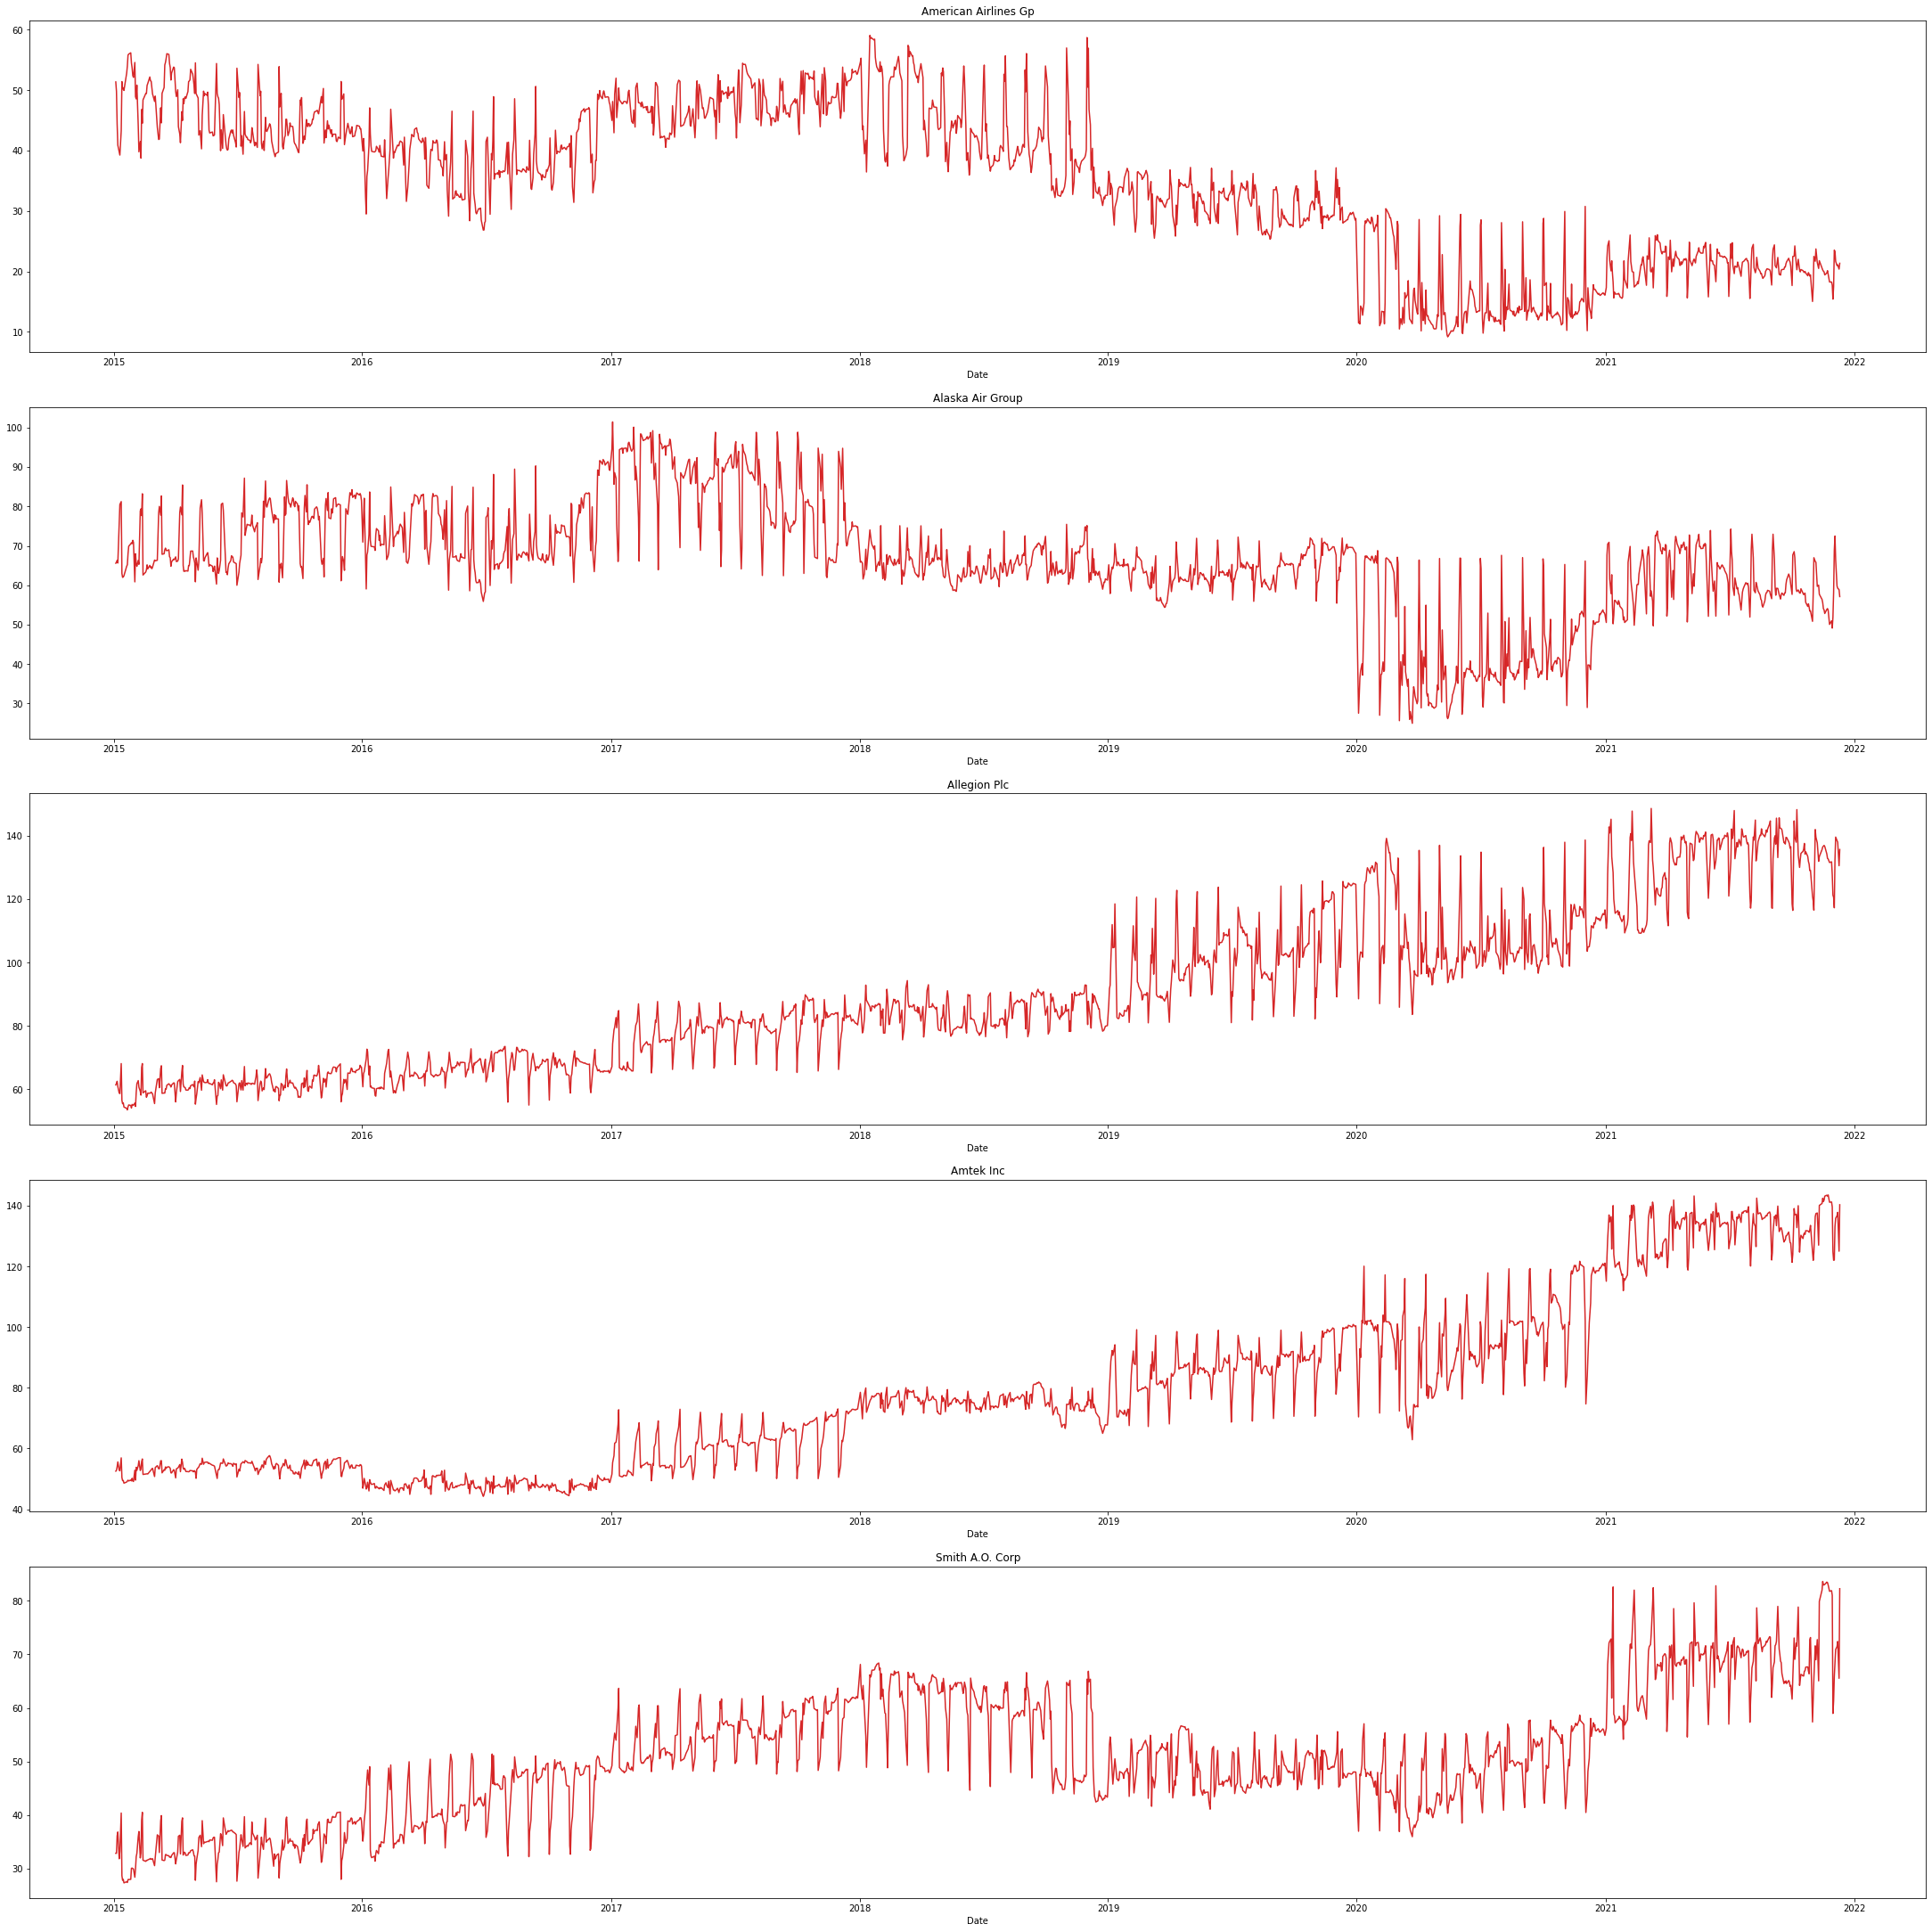

In [157]:
# The stock prices of the company under observation in the S&P 500 Industrials sector varying with time
fig, axs = plt.subplots(nrows= 5,constrained_layout=True,figsize=(30,30))

axs[0].plot(mean_df_AAL.index, mean_df_AAL['High'], 'tab:red')
axs[0].set_title('American Airlines Gp')
axs[1].plot(mean_df_ALK.index, mean_df_ALK['High'], 'tab:red')
axs[1].set_title('Alaska Air Group')
axs[2].plot(mean_df_ALLE.index, mean_df_ALLE['High'], 'tab:red')
axs[2].set_title('Allegion Plc')
axs[3].plot(mean_df_AME.index, mean_df_AME['High'], 'tab:red')
axs[3].set_title('Amtek Inc')
axs[4].plot(mean_df_AOS.index, mean_df_AOS['High'], 'tab:red')
axs[4].set_title('Smith A.O. Corp')
for ax in axs.flat:
    ax.set(xlabel='Date')

In [116]:
type(stock_data)

pandas.core.frame.DataFrame

In [117]:
stock_data.head()

Date Code        Low  ...       High      Close  Adjusted Close
0 1999-11-18    A  28.612303  ...  35.765381  31.473534       27.102232
1 1999-11-19    A  28.478184  ...  30.758226  28.880545       24.869375
2 1999-11-22    A  28.657009  ...  31.473534  31.473534       27.102232
3 1999-11-23    A  28.612303  ...  31.205294  28.612303       24.638391
4 1999-11-24    A  28.612303  ...  29.998213  29.372318       25.292847

[5 rows x 8 columns]

In [118]:
covid.head()

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01-22-2020          Anhui  ...         1      0          0
1    2      01-22-2020        Beijing  ...        14      0          0
2    3      01-22-2020      Chongqing  ...         6      0          0
3    4      01-22-2020         Fujian  ...         1      0          0
4    5      01-22-2020          Gansu  ...         0      0          0

[5 rows x 8 columns]

In [119]:
us_covid = covid[covid['Country/Region'] == 'US']

In [120]:
us_covid = us_covid.drop(['Province/State'], axis = 1)

In [121]:
us_covid.head()

SNo ObservationDate Country/Region  ... Confirmed  Deaths  Recovered
31    32      01-22-2020             US  ...         1       0          0
71    72      01-23-2020             US  ...         1       0          0
121  122      01-24-2020             US  ...         1       0          0
122  123      01-24-2020             US  ...         1       0          0
164  165      01-25-2020             US  ...         1       0          0

[5 rows x 7 columns]

In [122]:
covid_data = us_covid.groupby('ObservationDate')

In [123]:
covid_data.head()

SNo ObservationDate Country/Region  ... Confirmed  Deaths  Recovered
31          32      01-22-2020             US  ...         1       0          0
71          72      01-23-2020             US  ...         1       0          0
121        122      01-24-2020             US  ...         1       0          0
122        123      01-24-2020             US  ...         1       0          0
164        165      01-25-2020             US  ...         1       0          0
...        ...             ...            ...  ...       ...     ...        ...
305842  305843      05-29-2021             US  ...    543405   11146          0
305844  305845      05-29-2021             US  ...     70208     369          0
305869  305870      05-29-2021             US  ...    880466   17628          0
305870  305871      05-29-2021             US  ...    341290    5830          0
305913  305914      05-29-2021             US  ...   3788713   63236          0

[2450 rows x 7 columns]

###Merging datasets

In [124]:
us_covid['ObservationDate'] = pd.to_datetime(us_covid['ObservationDate'])

merged_data = pd.merge(us_covid, stock_data, 'inner', left_on = ['ObservationDate'], right_on = ['Date'])

In [125]:
merged_data.shape

(91945, 15)

In [126]:
merged_data

SNo ObservationDate  ...       Close Adjusted Close
0          32      2020-01-22  ...   90.129997      89.040840
1          32      2020-01-22  ...   92.029999      89.057205
2          32      2020-01-22  ...   87.209999      79.918480
3          32      2020-01-22  ...   91.860001      89.435913
4          32      2020-01-22  ...  184.419998     184.419998
...       ...             ...  ...         ...            ...
91940  305647      2021-05-28  ...  138.130005     137.777130
91941  305647      2021-05-28  ...  114.739998     113.901039
91942  305647      2021-05-28  ...  113.199997     110.610939
91943  305647      2021-05-28  ...  116.650002     115.760635
91944  305647      2021-05-28  ...  284.579987     284.579987

[91945 rows x 15 columns]

In [127]:
#remove duplicates
merged_data = merged_data.drop(['SNo'], axis = 1)
merged_data.drop_duplicates(inplace = True)

In [128]:
merged_data.to_csv(drive_path+'merged_data.csv')

In [129]:
merged_data.dtypes

ObservationDate    datetime64[ns]
Country/Region             object
Last Update                object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Date               datetime64[ns]
Code                       object
Low                       float64
Open                      float64
Volume                      int64
High                      float64
Close                     float64
Adjusted Close            float64
dtype: object

In [130]:
#Null Values by %
merged_data.isnull().sum()/ len(merged_data) * 100

ObservationDate    0.0
Country/Region     0.0
Last Update        0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
Date               0.0
Code               0.0
Low                0.0
Open               0.0
Volume             0.0
High               0.0
Close              0.0
Adjusted Close     0.0
dtype: float64

In [131]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data = merged_data.loc[merged_data.Date > '28-01-2020'].copy()

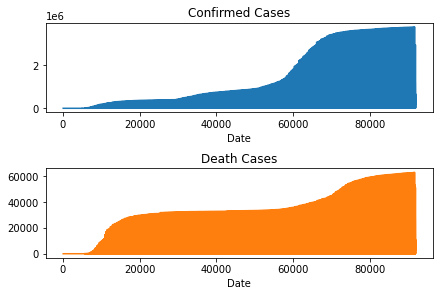

In [132]:
#Comparison of the trends of confirmed COVID-19 cases and the stock price of the company under observation
fig, axs = plt.subplots(nrows= 2,constrained_layout=True)

axs[0].plot(merged_data.index, merged_data['Confirmed'])
axs[0].set_title('Confirmed Cases')

axs[1].plot(merged_data.index, merged_data['Deaths'], 'tab:orange')
axs[1].set_title('Death Cases')

for ax in axs.flat:
    ax.set(xlabel='Date')

In [133]:
industrials_merged_data = pd.read_csv(drive_path + "Industrials_merged_data.csv")

In [134]:
industrials_merged_data

Unnamed: 0     SNo  ...       Close Adjusted Close
0               0     563  ...   29.090000      28.982893
1               1     563  ...   68.169998      67.785583
2               2     563  ...  125.389999     122.859001
3               3     563  ...  100.800003      99.565559
4               4     563  ...   47.770000      46.011982
...           ...     ...  ...         ...            ...
35965       35965  292642  ...   21.820000      21.820000
35966       35966  292642  ...   59.349998      59.349998
35967       35967  292642  ...  131.410004     131.410004
35968       35968  292642  ...  140.940002     140.940002
35969       35969  292642  ...   77.550003      77.550003

[35970 rows x 16 columns]

In [135]:
industrials_merged_data['Date'] = pd.to_datetime(industrials_merged_data['Date'])
industrials_merged_data = industrials_merged_data.loc[industrials_merged_data.Date > '28-01-2020'].copy()

In [136]:
IT_merged_data = pd.read_csv(drive_path + "IT_merged_data.csv")

In [137]:
IT_merged_data

Unnamed: 0     SNo  ...       Close Adjusted Close
0               0     563  ...   75.087502      73.988464
1               1     563  ...  210.149994     204.304413
2               2     563  ...  120.430000     116.062119
3               3     563  ...  170.320007     163.903610
4               4     563  ...  187.830002     187.830002
...           ...     ...  ...         ...            ...
35965       35965  292642  ...  151.279999     151.279999
35966       35966  292642  ...  368.459991     368.459991
35967       35967  292642  ...  184.179993     183.477249
35968       35968  292642  ...  229.600006     229.600006
35969       35969  292642  ...  324.519989     324.519989

[35970 rows x 16 columns]

In [138]:
IT_merged_data['Date'] = pd.to_datetime(IT_merged_data['Date'])
IT_merged_data = IT_merged_data.loc[IT_merged_data.Date > '28-01-2020'].copy()

In [139]:
us_vaccinations = pd.read_csv(drive_path + "us_vaccinations.csv")
us_vaccinations.dropna(subset = ["people_fully_vaccinated"], inplace=True)
us_vaccinations.head()

country iso_code        date  people_fully_vaccinated
0  United States      USA  2021-01-14                1342086.0
1  United States      USA  2021-01-15                1610524.0
2  United States      USA  2021-01-19                2023124.0
3  United States      USA  2021-01-20                2161419.0
4  United States      USA  2021-01-21                2394961.0

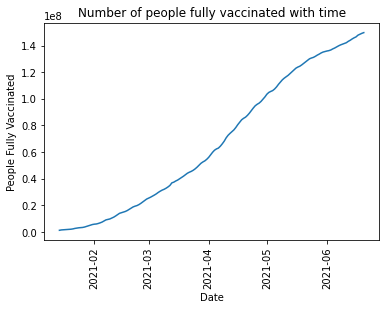

In [140]:
us_vaccinations['date'] = pd.to_datetime(us_vaccinations['date'])

plt.title('Number of people fully vaccinated with time')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.xticks(rotation = 'vertical')
plt.plot(us_vaccinations['date'],us_vaccinations['people_fully_vaccinated'])

###Data Modeling

We have used Multiple Linear Regression to perform prediction of Stock market prices based on COVID-19. Multiple Linear Regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.<br>
Here, we estimate the relationship between COVID-19 confirmed cases, deaths, recovered cases and the closing stock price of companies in each sector.
<br><br>
We have performed a Train-Test-Split of 75% training data and 25% testing data.<br>
Input variables – Confirmed cases, Deaths, Recovered, High, Low<br>
Target variable – Close price


In [141]:
#importing necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [142]:
def train_test(data_X,data_Y):
  train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)
  print('\n\nTraining Set')
  print(train_X.head())
  print(train_y.head())
  #Creating the Regressor
  regressor = LinearRegression()
  regressor.fit(train_X,train_y)
  #Make Predictions and Evaluate the results
  predict_y = regressor.predict(test_X)
  print('Prediction Score : ' , regressor.score(test_X,test_y))
  error = mean_squared_error(test_y,predict_y)
  print('Mean Squared Error : ',error)
  #Plot the predicted and the expected values
  fig, axs = plt.subplots(nrows= 2,constrained_layout=True,figsize=(20,20))
  axs[0].plot(test_X['Open'],test_y,'tab:orange')
  axs[0].set_title('Actual Price')

  axs[1].plot(test_X['Open'],predict_y, 'tab:blue')
  axs[1].set_title('Predicted Price')
  #Plot the predicted and the expected values
  fig = plt.figure()
  ax = plt.axes()
  ax.grid()
  ax.set(xlabel='Close ($)',ylabel='Open ($)', title=' Stock Prediction using Linear Regression')
  ax.plot(test_X['Open'],test_y,'tab:orange')
  ax.plot(test_X['Open'],predict_y, 'tab:blue')
  fig.savefig('LRPlot.png')
  plt.show()



Training Set
                   Low        Open   Volume        High  Adjusted Close
Date                                                                   
2020-09-30  100.309998  100.540001  1362200  101.889999      100.183929
2015-05-10   34.840000   35.040001  1675400   35.389999       33.533119
2016-04-14   40.529999   40.860001  1347800   41.080002       38.913090
2018-06-09   66.830002   67.000000  1031500   67.550003       65.680969
2017-03-08   59.970001   60.150002   982900   60.439999       58.342945
Date
2020-09-30    100.940002
2015-05-10     35.340000
2016-04-14     40.779999
2018-06-09     67.360001
2017-03-08     60.369999
Name: Close, dtype: float64
Prediction Score :  0.9999511240257017
Mean Squared Error :  0.05849979938753653


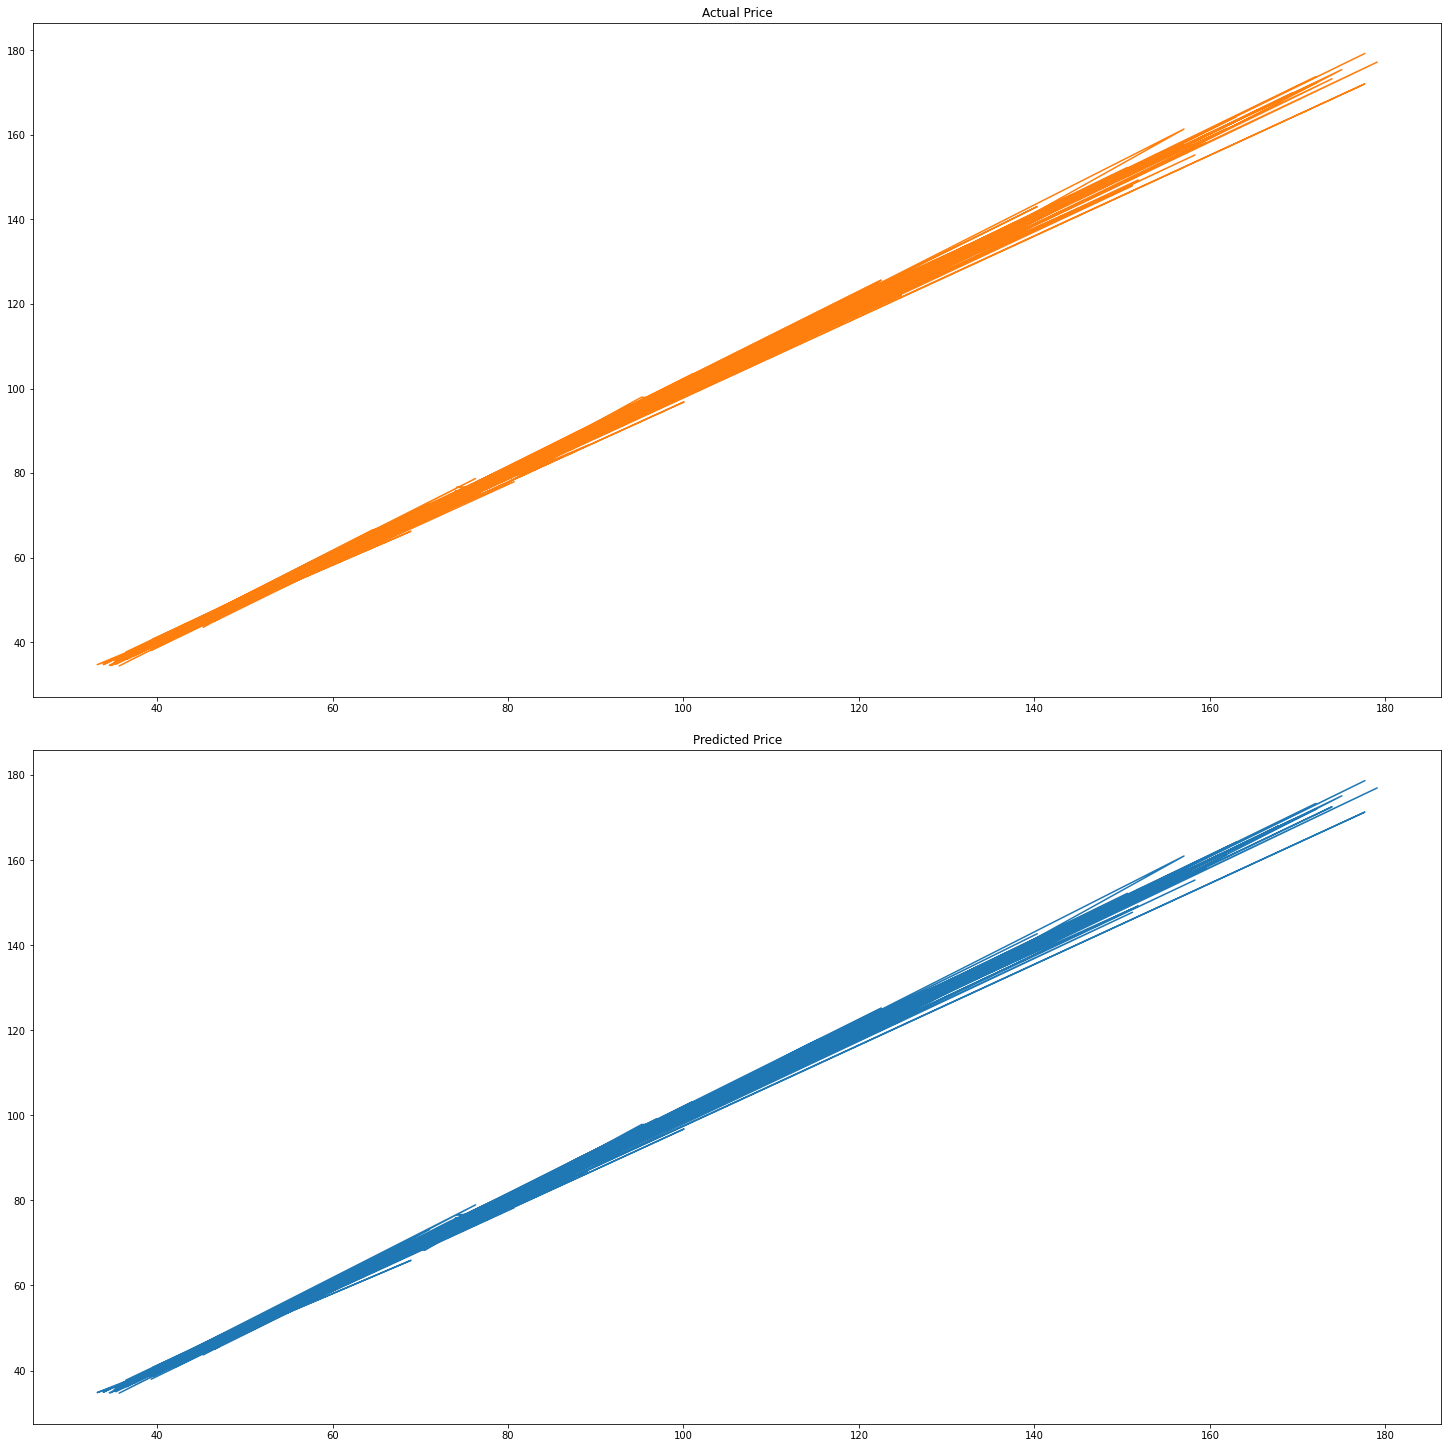

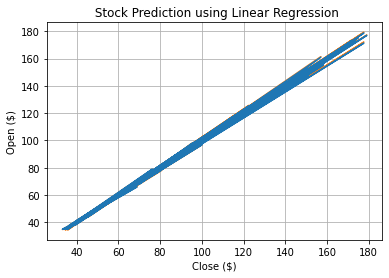

In [143]:
#Agilent Technologies price predcition
data_X = mean_df_A.loc[:,mean_df_A.columns !=  'Close' ]
data_Y = mean_df_A['Close']
train_test(data_X,data_Y)



Training Set
                   Low        Open   Volume        High  Adjusted Close
Date                                                                   
2018-08-23   87.519997   88.230003   836000   88.589996       83.434029
2015-08-13  102.290001  104.730003  1667000  105.290001       93.334358
2020-04-02   87.010002   87.150002  1498600   89.139999       85.244476
2020-09-04   86.660004   88.180000  1348700   89.410004       85.347778
2020-02-19   93.839996   94.589996   915800   95.199997       92.462524
Date
2018-08-23     88.279999
2015-08-13    103.879997
2020-04-02     88.089996
2020-09-04     87.809998
2020-02-19     95.129997
Name: Close, dtype: float64
Prediction Score :  0.9975131435662385
Mean Squared Error :  0.4434983010200647


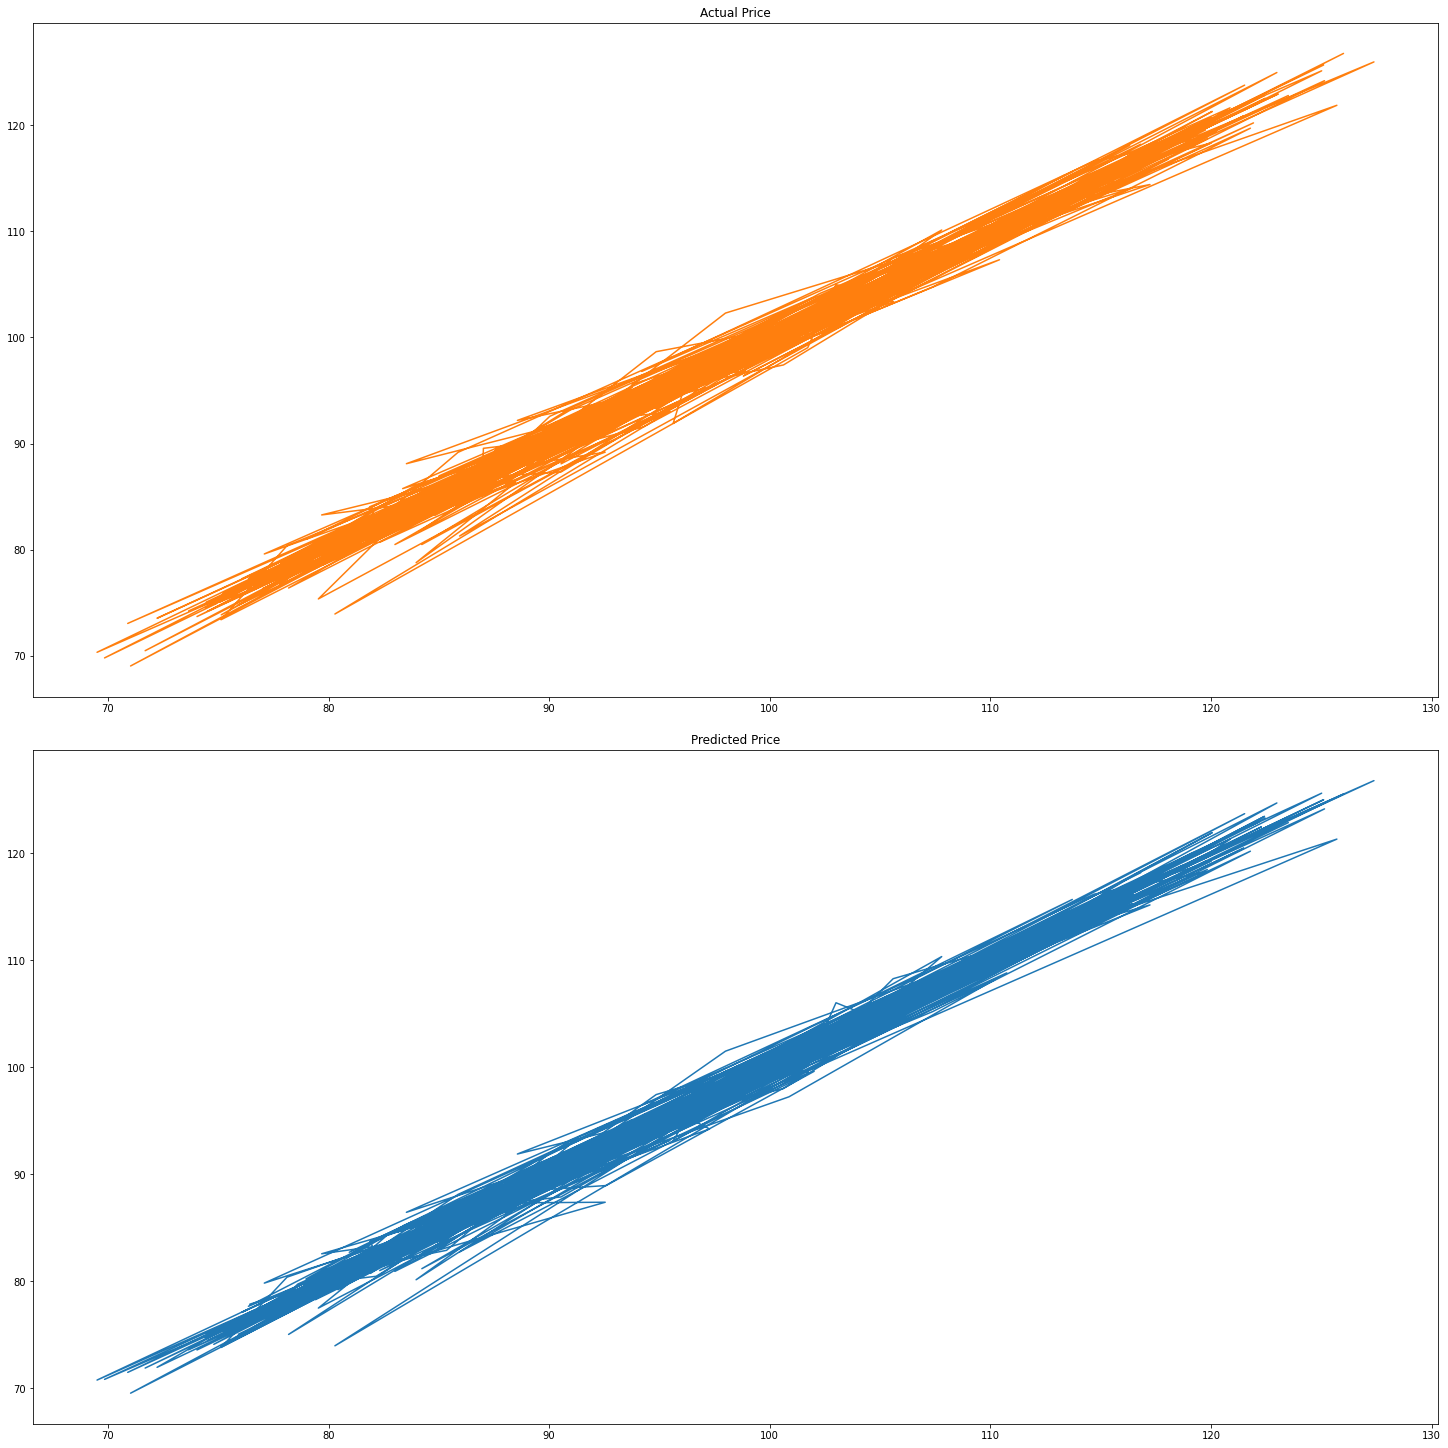

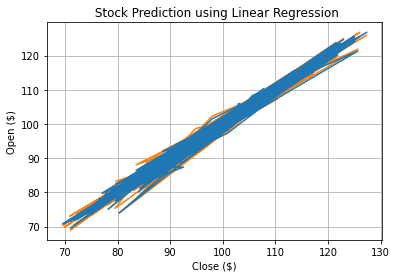

In [144]:
#Amerisourcebergen Corp price predcition
data_X_1 = mean_df_ABC.loc[:,mean_df_ABC.columns !=  'Close' ]
data_Y_1 = mean_df_ABC['Close']
train_test(data_X_1,data_Y_1)



Training Set
                   Low        Open    Volume        High  Adjusted Close
Date                                                                    
2021-04-16  107.139999  107.489998   8207700  108.550003      105.441933
2021-09-16  106.529999  108.239998   5821800  108.750000      106.785393
2015-12-03   56.650002   56.779999  18227800   58.910000       43.287979
2016-11-07   64.070000   64.250000   9641500   64.989998       50.230419
2020-02-26   88.190002   88.620003   9786900   91.180000       81.018158
Date
2021-04-16    107.910004
2021-09-16    108.080002
2015-12-03     58.000000
2016-11-07     64.349998
2020-02-26     88.410004
Name: Close, dtype: float64
Prediction Score :  0.9990761469836617
Mean Squared Error :  0.3209618522215393


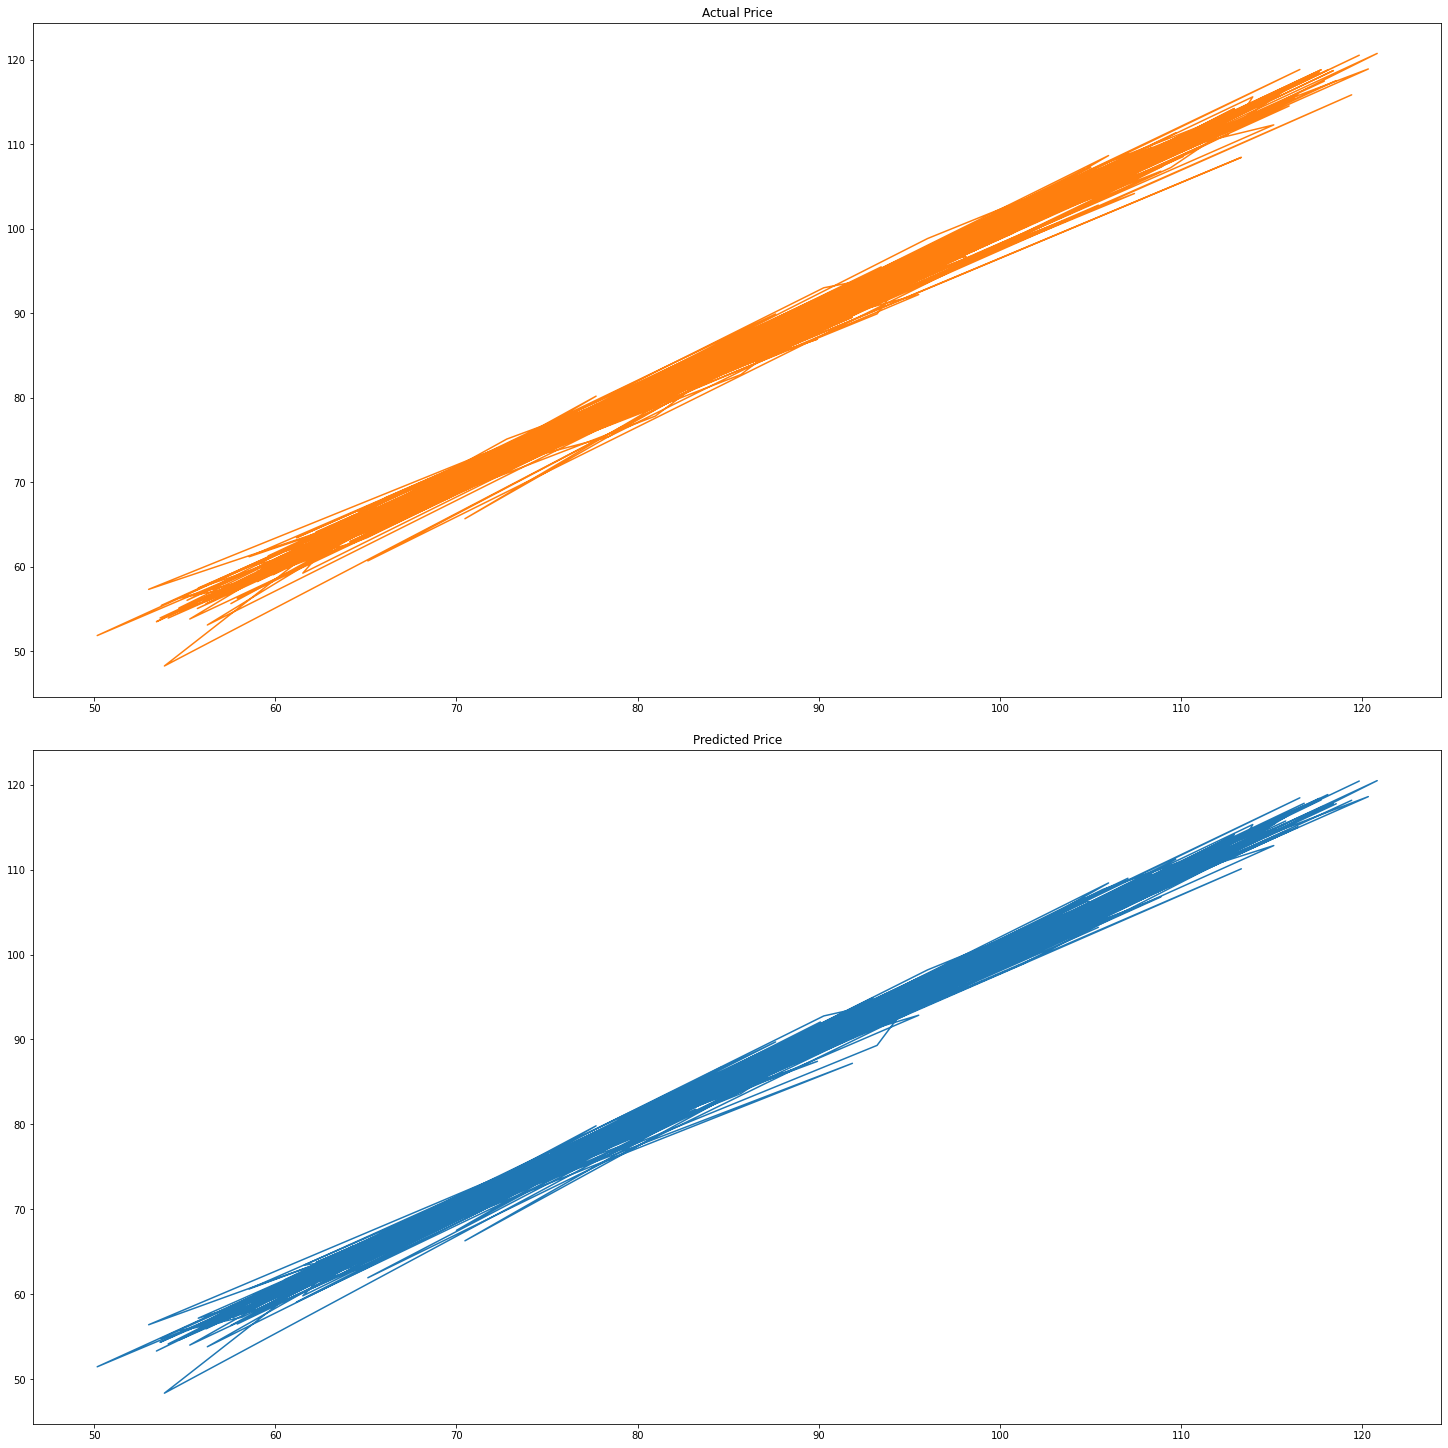

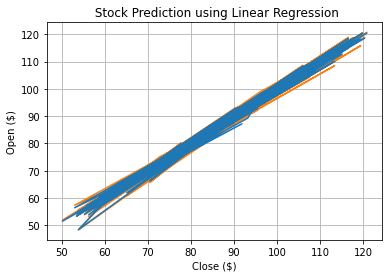

In [145]:
#Abbvie Inc price predcition
data_X_2 = mean_df_ABBV.loc[:,mean_df_ABBV.columns !=  'Close' ]
data_Y_2 = mean_df_ABBV['Close']
train_test(data_X_2,data_Y_2)

IT industry



Training Set
                  Low       Open     Volume       High  Adjusted Close
Date                                                                  
2020-05-22  78.837502  78.942497   81803200  79.807503       78.955223
2018-10-08  51.667500  51.840000   98444800  52.275002       50.191231
2018-07-18  47.482498  47.945000   65573600  47.950001       45.887394
2019-08-15  49.917500  50.865002  108909600  51.285000       49.548042
2016-07-07  23.905001  23.924999  100558400  24.125000       22.340302
Date
2020-05-22    79.722504
2018-10-08    51.882500
2018-07-18    47.599998
2019-08-15    50.435001
2016-07-07    23.985001
Name: Close, dtype: float64
Prediction Score :  0.9999398861874973
Mean Squared Error :  0.08815758497105257


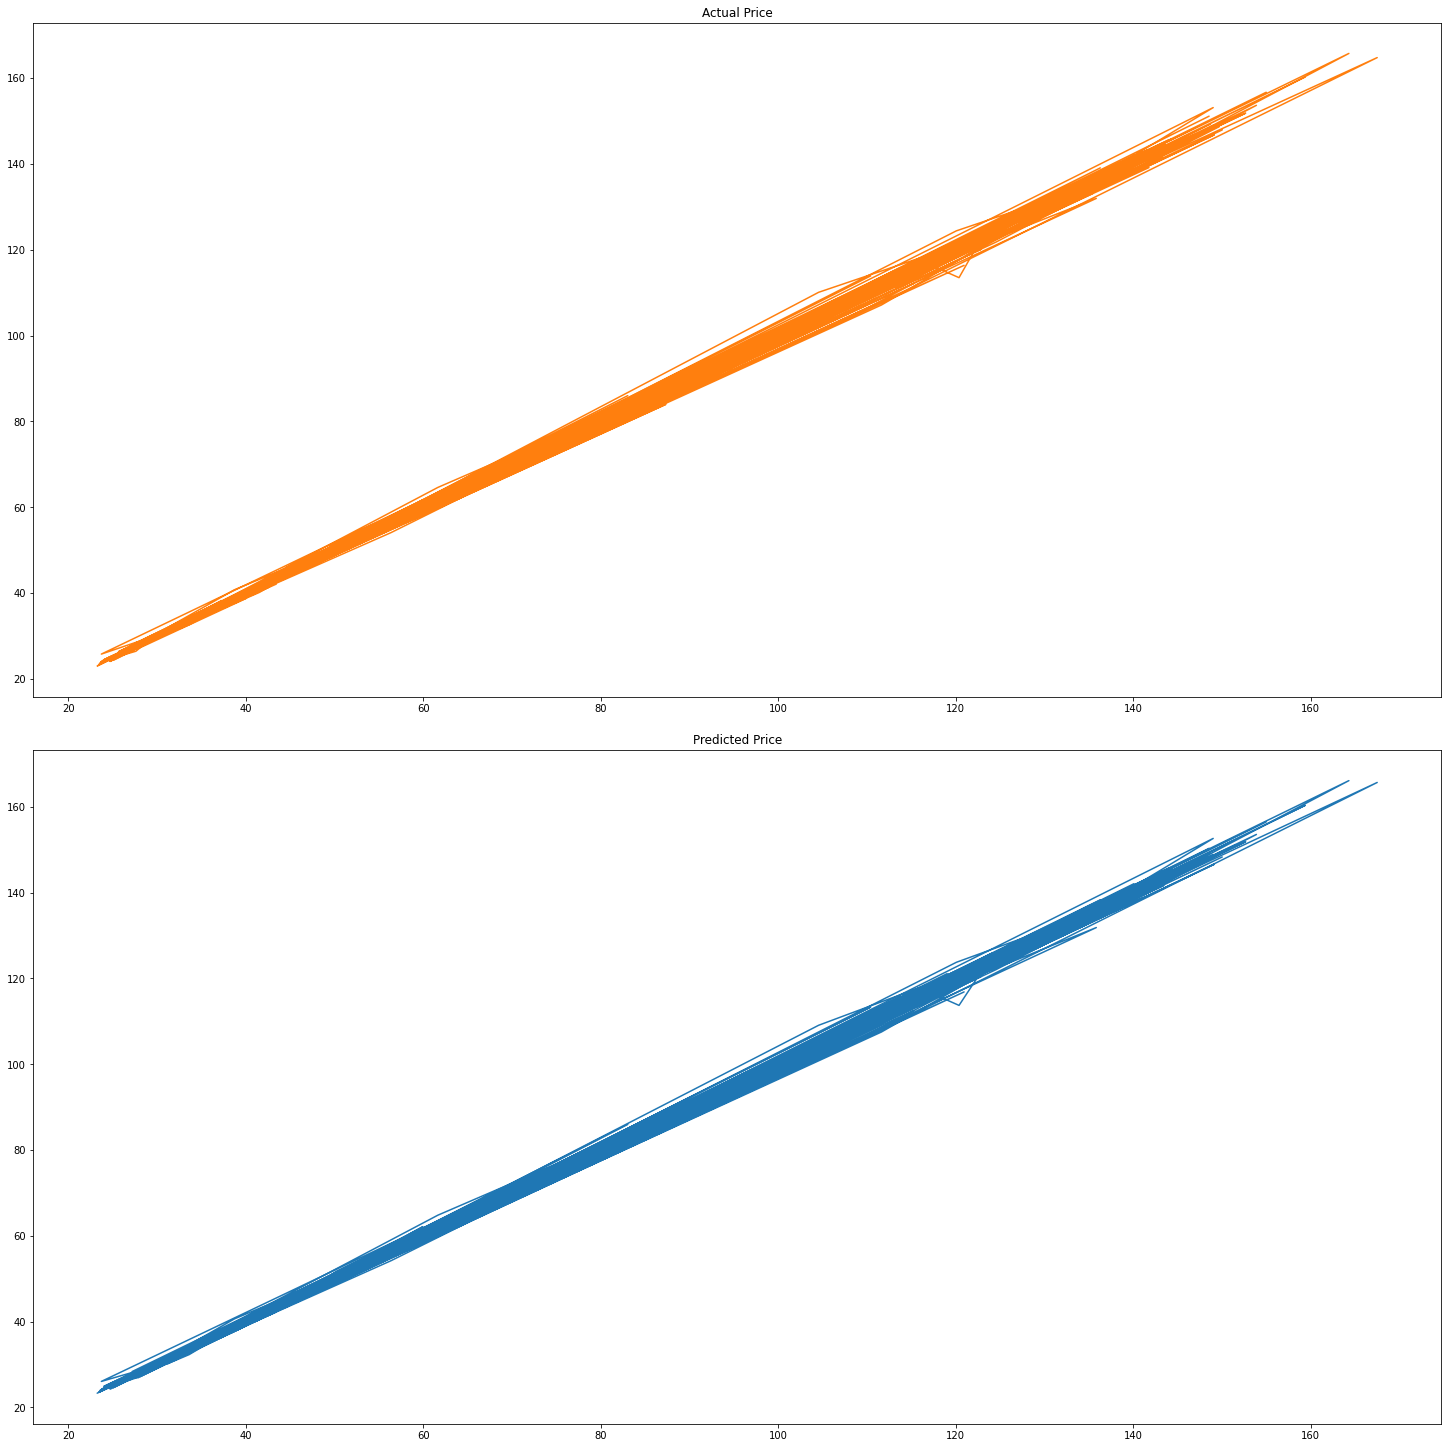

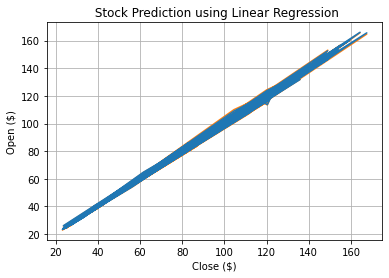

In [146]:
#Apple price prediction

data_X_IT_1 = mean_df_AAPL.loc[:,mean_df_AAPL.columns !=  'Close' ]
data_Y_IT_1 = mean_df_AAPL['Close']
train_test(data_X_IT_1,data_Y_IT_1)



Training Set
                   Low        Open   Volume        High  Adjusted Close
Date                                                                   
2018-02-08  157.839996  158.300003  1774700  160.300003      152.363037
2020-07-30  219.779999  220.809998  1408600  223.990005      220.382324
2015-08-18  103.099998  103.639999  1952300  104.089996       93.107552
2016-11-16  115.760002  116.190002  2147100  118.029999      108.452789
2020-12-16  246.220001  247.020004  2248000  248.289993      244.428741
Date
2018-02-08    160.149994
2020-07-30    223.979996
2015-08-18    103.860001
2016-11-16    117.320000
2020-12-16    247.449997
Name: Close, dtype: float64
Prediction Score :  0.9999015690376712
Mean Squared Error :  0.47069083246905047


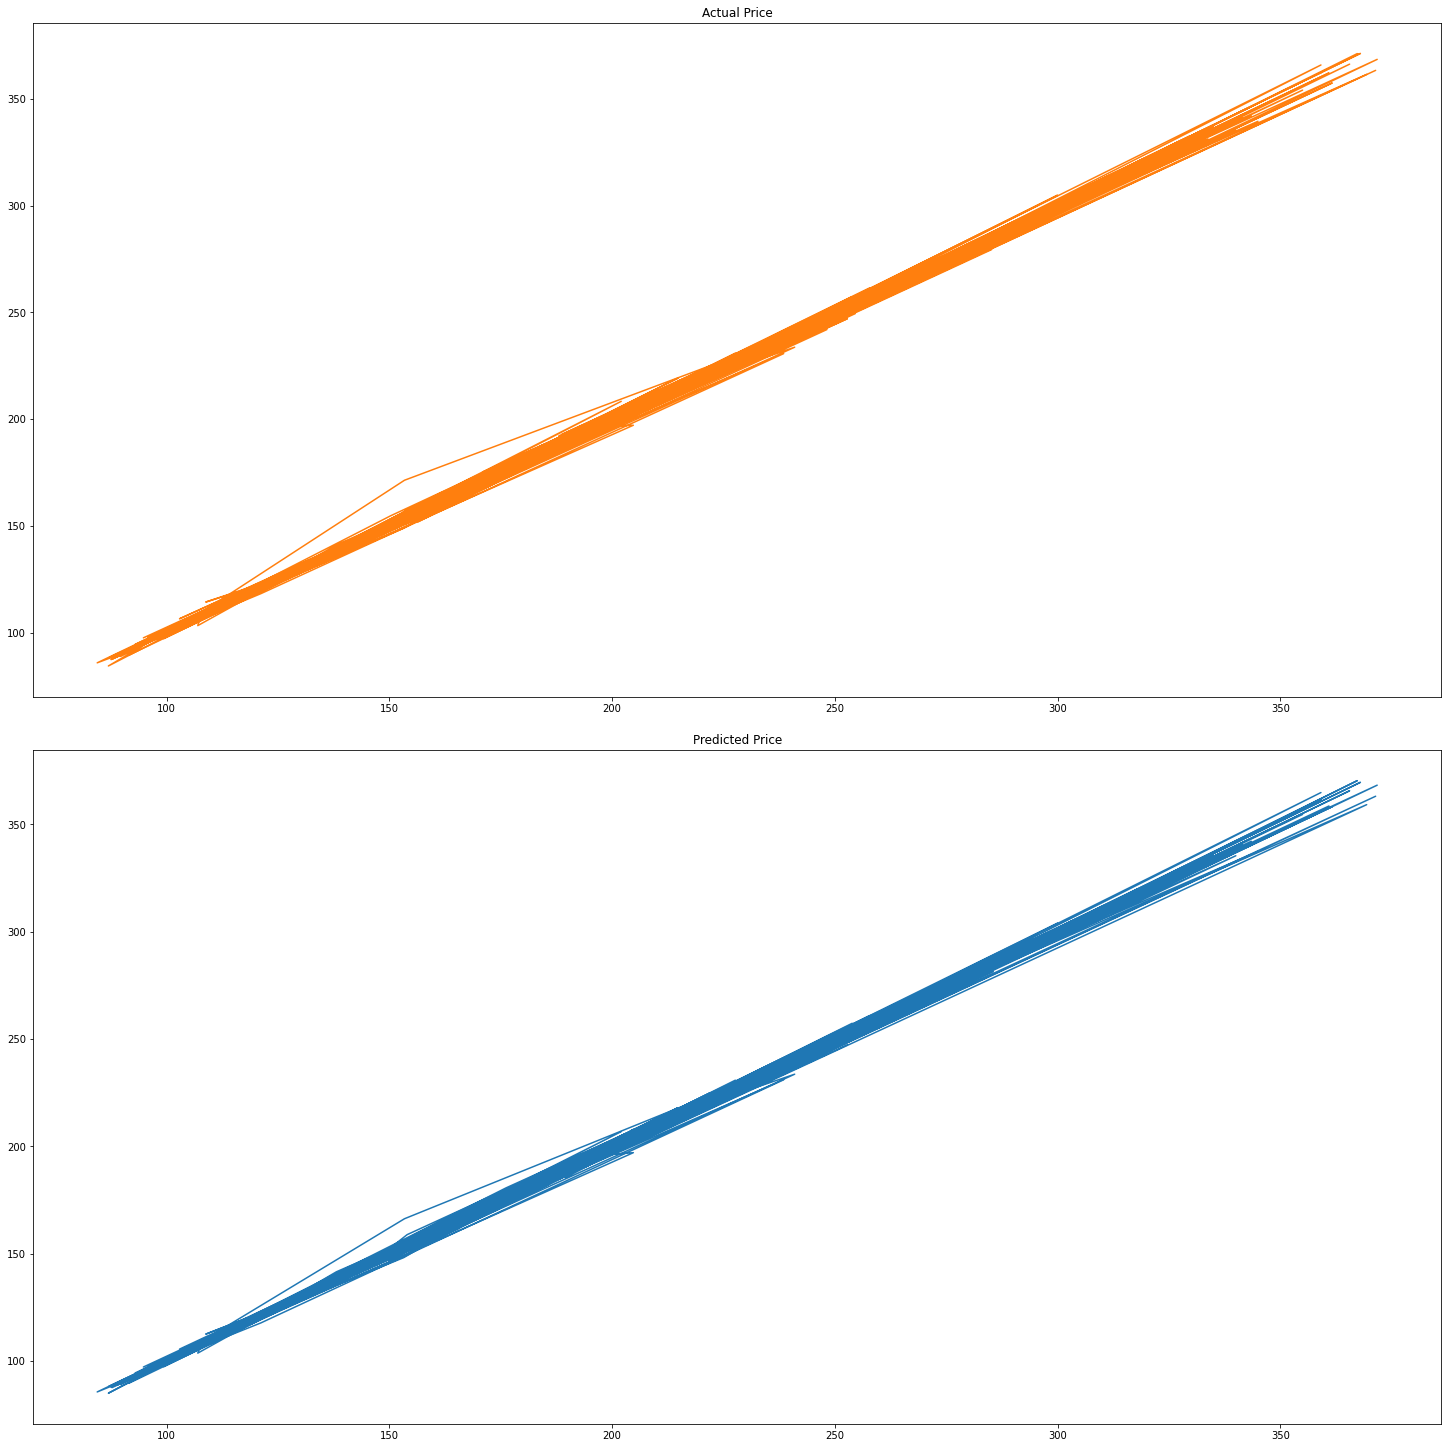

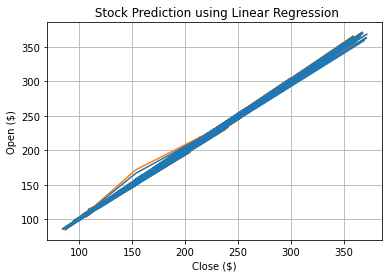

In [147]:
#Accenture Plc Price Prediction
data_X_IT_2 = mean_df_ACN.loc[:,mean_df_ACN.columns !=  'Close' ]
data_Y_IT_2 = mean_df_ACN['Close']
train_test(data_X_IT_2,data_Y_IT_2)





Training Set
                   Low        Open    Volume        High  Adjusted Close
Date                                                                    
2016-10-17   61.330002   61.650002   2475900   62.290001       55.557636
2016-07-27   62.950001   66.779999  14963000   66.910004       56.649963
2017-06-27   77.820000   80.139999   4009800   80.550003       71.548279
2015-12-29   56.689999   56.799999   1347700   57.750000       50.479744
2020-06-02  115.349998  116.940002   1398100  117.190002      111.590416
Date
2016-10-17     61.700001
2016-07-27     63.330002
2017-06-27     78.139999
2015-12-29     57.310001
2020-06-02    115.790001
Name: Close, dtype: float64
Prediction Score :  0.9996794922930146
Mean Squared Error :  0.3394879916204729


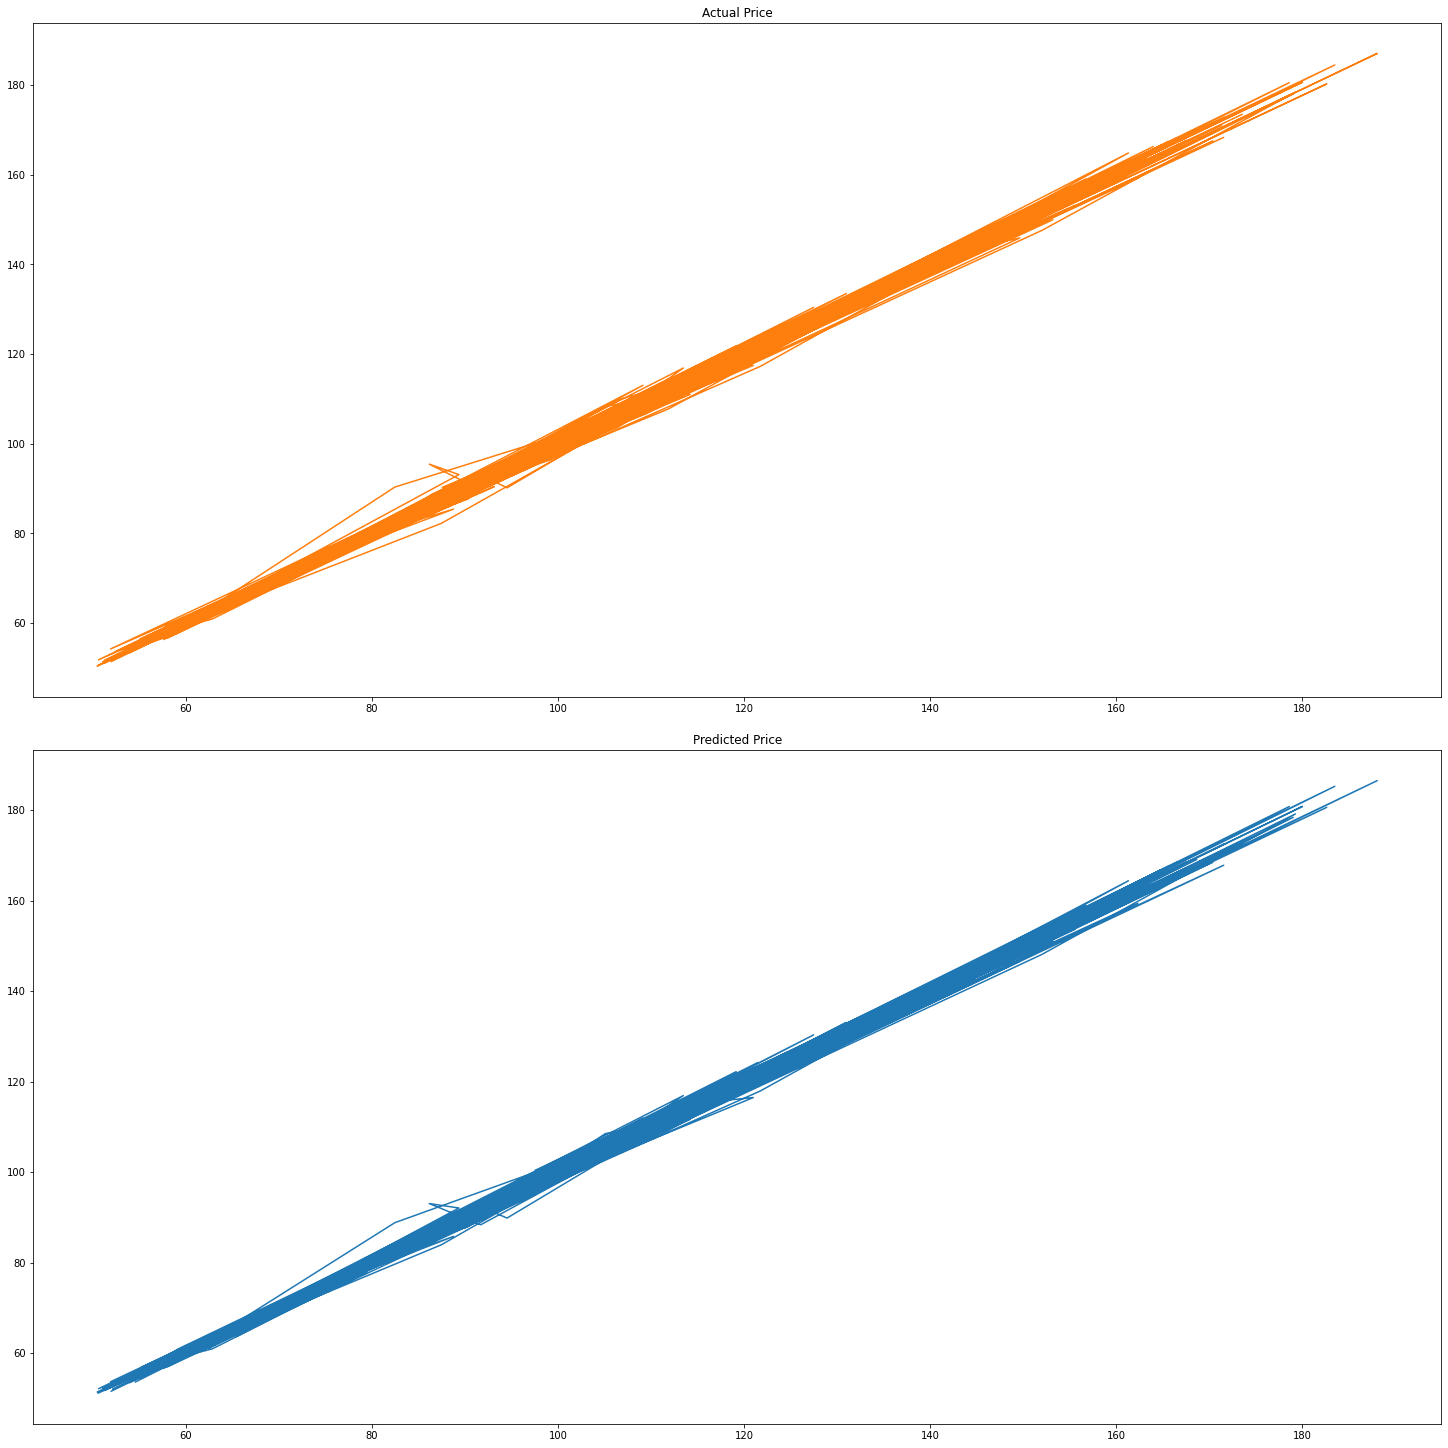

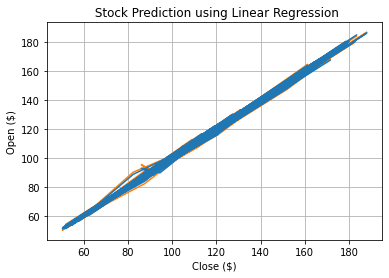

In [148]:
#Analog Devices Price Prediction
data_X_IT_3 = mean_df_ADI.loc[:,mean_df_ADI.columns !=  'Close' ]
data_Y_IT_3 = mean_df_ADI['Close']
train_test(data_X_IT_3,data_Y_IT_3)

Price Prediction of Industries



Training Set
                  Low       Open    Volume       High  Adjusted Close
Date                                                                 
2021-04-22  20.040001  21.580000  72635100  21.610001       20.070000
2015-11-23  41.810001  42.110001   4166100  42.740002       40.423809
2020-03-23  10.010000  10.900000  56427300  11.360000       10.250000
2020-12-08  13.100000  14.030000  77379800  14.060000       13.540000
2019-03-15  31.420000  32.279999   9645100  32.349998       31.014189
Date
2021-04-22    20.070000
2015-11-23    42.299999
2020-03-23    10.250000
2020-12-08    13.540000
2019-03-15    31.430000
Name: Close, dtype: float64
Prediction Score :  0.9995453193409567
Mean Squared Error :  0.07245122951146056


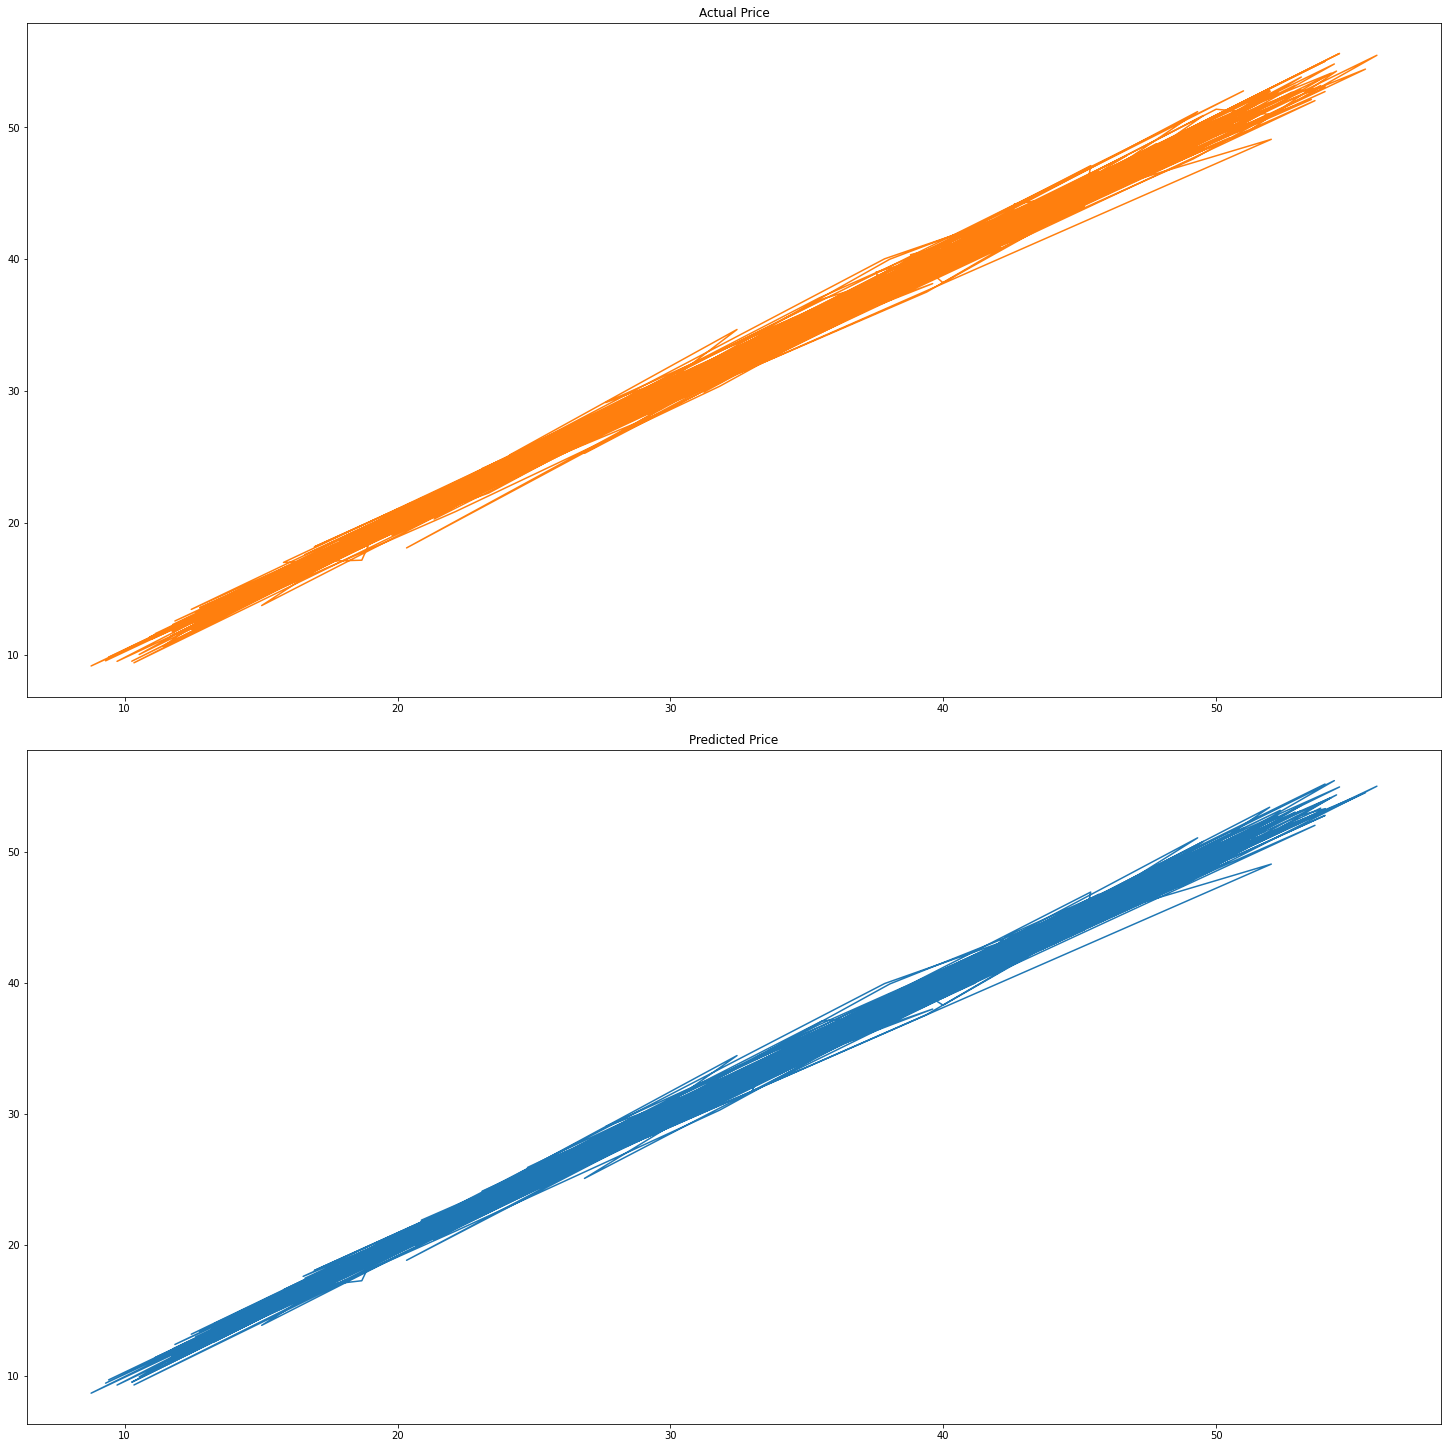

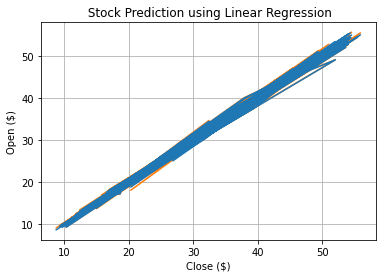

In [149]:
#American Airlines Price Prediction
data_X_IN_1 = mean_df_AAL.loc[:,mean_df_AAL.columns !=  'Close' ]
data_Y_IN_1 = mean_df_AAL['Close']
train_test(data_X_IN_1,data_Y_IN_1)



Training Set
                  Low       Open   Volume       High  Adjusted Close
Date                                                                
2018-10-09  66.709999  67.239998   867700  68.570000       65.999069
2018-12-11  65.050003  66.010002   982900  66.739998       63.684498
2020-06-03  41.400002  41.500000  5041700  48.400002       45.209999
2020-07-13  34.630001  35.950001  2248700  36.130001       34.880001
2021-04-13  67.760002  70.519997  3012600  70.830002       70.220001
Date
2018-10-09    68.150002
2018-12-11    65.760002
2020-06-03    45.209999
2020-07-13    34.880001
2021-04-13    70.220001
Name: Close, dtype: float64
Prediction Score :  0.9985951131271696
Mean Squared Error :  0.2908190162822752


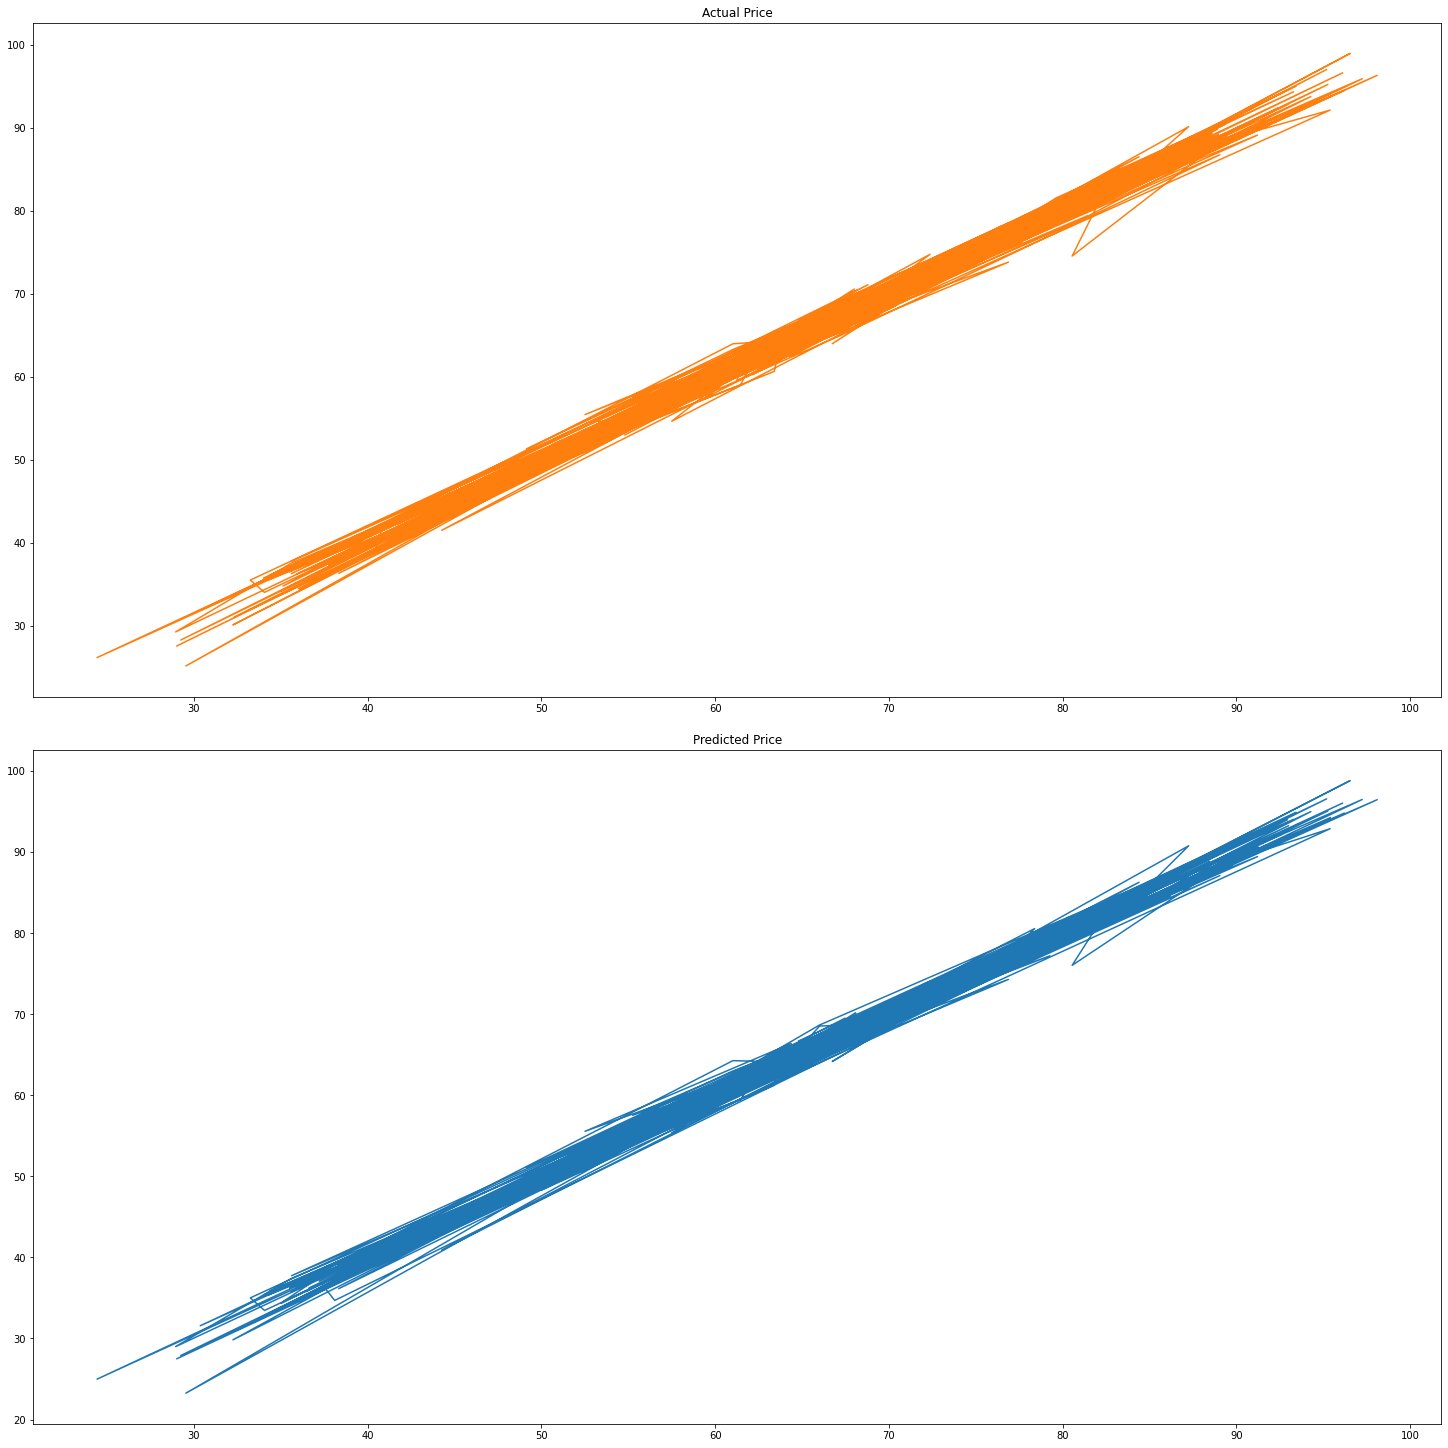

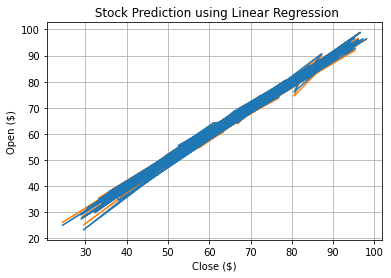

In [150]:
#Alaska Air Group Price Prediction
data_X_IN_2 = mean_df_ALK.loc[:,mean_df_ALK.columns !=  'Close' ]
data_Y_IN_2 = mean_df_ALK['Close']
train_test(data_X_IN_2,data_Y_IN_2)



Training Set
                   Low        Open  Volume        High  Adjusted Close
Date                                                                  
2020-04-08   98.279999   99.599998  700800  100.059998       97.989182
2020-08-05  101.519997  101.940002  409900  103.790001      100.493301
2021-01-04  124.620003  125.849998  735800  128.000000      127.088814
2016-09-23   68.419998   69.050003  340600   69.050003       65.280342
2018-06-11   87.779999   88.349998  319700   89.430000       86.192299
Date
2020-04-08     99.410004
2020-08-05    102.269997
2021-01-04    127.750000
2016-09-23     68.669998
2018-06-11     89.110001
Name: Close, dtype: float64
Prediction Score :  0.9996361883099092
Mean Squared Error :  0.20965110003612197


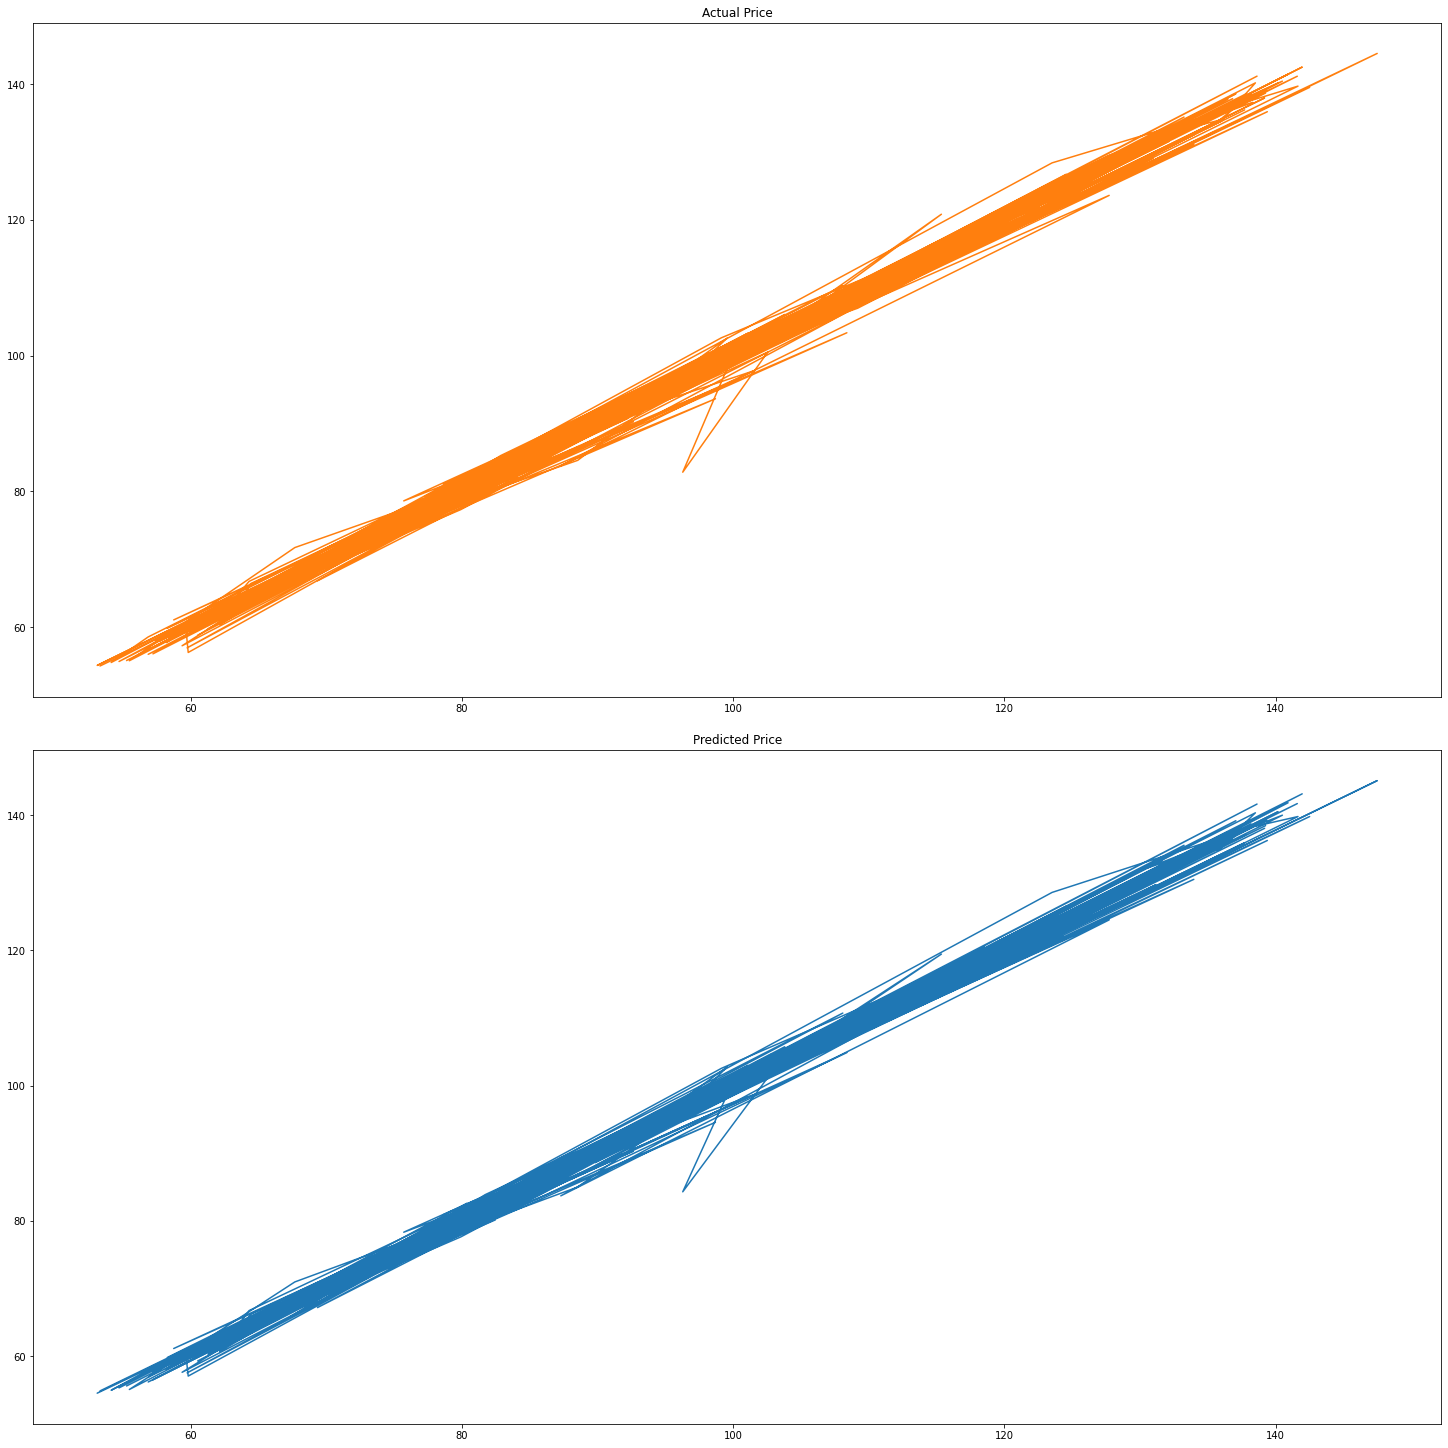

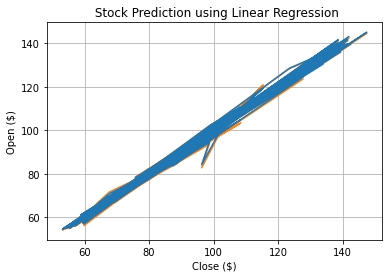

In [151]:
#Allegion Plc Group Price Prediction
data_X_IN_3 = mean_df_ALLE.loc[:,mean_df_ALLE.columns !=  'Close' ]
data_Y_IN_3 = mean_df_ALLE['Close']
train_test(data_X_IN_3,data_Y_IN_3)

###Evaluation
We have evaluated the performance of our model using Mean Squared Error(MSE). MSE of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.<br>

Our model generates a **MSE of 0.01 and Prediction Score of 0.99**


###Conclusion
Using DataRobot Paxata we have merged the S&P 500 health care index datasets, IT industry dataset, and industrial dataset along with covid_19 dataset based on date. <br>We have used linear regression as our prediction model and mean square error as our evaluation model. The basic idea of our evaluation model is to measure how bad/erroneous the model's predictions are when compared to actual observed values.<br>Our prediction model has an accuracy of 0.99 and the mean square error is 0.011.<br><br>
We had faced a problem with finding a model suitable to our prediction requirements. As per our understanding, algorithms like ARIMA, Facebook Prophet accepted only one attribute/feature, whereas we had five different features in our cleaned data. <br>We then found and implemented the Multiple Linear Regression model.

###Future Scope
With further calculations, we may also be able to predict the values of sector indices in the S&P 500 market. With a similar approach, we can predict the impact of covid-19 on different sectors(Other than health, IT, and industries)
